# Predicción de Automoviles - AutoTech 

### PRE-ESPECIALIDAD:  

#### Ingeniería en ciencias de datos. 
#### ESTUDIANTES:  
* Escobar Chávez, Daniel Enrique   25-5351-2018   
* Espinoza Fuentes, José Mauricio  25-4443-2004   
* Jiménez Rivas, Giovanny Alfredo  25-5208-2018   
* Rodríguez Ruano, Evelyn Vanessa  25-1676-2019   
* Zepeda Romero, José Antonio      25-4916-2018   



 

### Objetivo:
#### Analizar las Caracteristicas de los precios de los automóviles y desarrollar un modelo predictivo.

### Problema: 
#### Nuestro objetivo principal es entender qué caracteristicas influyen en los precios de los automóviles. 
#### Además, queremos construir un modelo predictivo que nos permita predecir con precisión los precios de los automóviles utilizando datos/variables relevantes mediante la caracteristicas.

### Descripción del problema:
#### Nos proponemos investigar los impulsores detrás de las fluctuaciones de precios en el mercado automotriz. 
#### Con este fin, nuestro objetivo principal es analizar y comprender los factores que impactan directamente en los precios de los automóviles. 
#### Para lograr una comprensión más profunda y práctica, aspiramos a desarrollar un modelo predictivo capaz de proyectar los precios de los automóviles en función de los datos recopilados y las variables consideradas relevantes en nuestro análisis.


In [1]:
#Librerias A utilizar
import os
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from math import sqrt

%matplotlib inline

# Para cambiar los números científicos a formato float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Aumenta el tamaño de sns plots
sns.set(rc={'figure.figsize':(5,5)})

# ver todo el dataframe
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

# eliminar los warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


# Cargando los Datos sin Procesar

In [2]:
# cargando la data
#raw_data = pd.read_csv('CarPrice_Assignment_v3N.csv')
#raw_data = pd.read_excel('CarPrice_Assignment_v3N.xlsx')
raw_data = pd.read_excel('CarPrice_Assignment_DS2.xlsx')

# print the shape
print(raw_data.shape)

#runs the first 5 rows
raw_data.head()


(250, 26)


car_ID  symboling                                            CarName  \
0     751          2  Mahindra-XUV700 AX 7 diesel AT AWD Luxury Pack...   
1     752          3             Audi-Q7 35 TDI Premium + Sunroof - 957   
2     753          2  Hyundai-Grand i10 Magna 1.2 Kappa VTVT [2013-2...   
3     754          2      Land Rover-Discovery Sport HSE 7-Seater - 959   
4     755          2       Toyota-Fortuner 2.8 4x2 AT [2016-2020] - 960   

   fueltype aspiration doornumber    carbody drivewheel enginelocation  \
0    diesel        std       four        SUV        awd          front   
1    diesel        std       four        SUV        awd          front   
2  gasolina        std       four  hatchback        fwd          front   
3    diesel        std       four        SUV        awd          front   
4    diesel        std       four        SUV        rwd          front   

   wheelbase  carlength  carwidth  carheight  curbweight enginetype  \
0       97.3      469.5     189.0      175.5    33169.50       dohc   
1       94.5      508.9     198.3      173.7    34444.71       dohc   
2       94.5      376.5     166.0      152.0    25232.00        ohc   
3      100.4      460.0     206.9      172.4    35669.56        ohc   
4      100.4      479.5     185.5      183.5    34039.25        ohc   

  cylindernumber  enginesize fuelsystem  boreratio  stroke  compressionratio  \
0           four        2184       mpfi       3.78    3.15               9.5   
1            six        2967       mpfi       3.78    3.15               9.5   
2            six        1197        idi       3.78    3.15               9.5   
3           four        2179       mpfi       3.62    3.15               7.5   
4           four        2755        idi       3.62    3.15               7.5   

   horsepower  peakrpm  citympg  highwaympg    price  
0         450     1750       19          24  33000.0  
1         550     1750       20          24  28800.0  
2         114     4000       19          24   5940.0  
3         400     1750       37          46  50400.0  
4         450     1600       27          34  30600.0

# Procesamiento de Datos

##  Análisis Exploratorio de Datos (EDA)

In [3]:
# Investigar todos los elementos dentro de cada característica. 

for column in raw_data:
    unique_vals = np.unique(raw_data[column])
    nr_values = len(unique_vals)
    if nr_values < 10:
        print('El número de valores para la característica {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('El número de valores para la característica {} :{}'.format(column, nr_values))

El número de valores para la característica car_ID :250
El número de valores para la característica symboling :6 -- [-2 -1  0  1  2  3]
El número de valores para la característica CarName :250
El número de valores para la característica fueltype :2 -- ['diesel' 'gasolina']
El número de valores para la característica aspiration :2 -- ['std' 'turbo']
El número de valores para la característica doornumber :1 -- ['four']
El número de valores para la característica carbody :5 -- ['Coupé' 'SUV' 'Van' 'hatchback' 'sedan']
El número de valores para la característica drivewheel :3 -- ['awd' 'fwd' 'rwd']
El número de valores para la característica enginelocation :1 -- ['front']
El número de valores para la característica wheelbase :5 -- [94.500000 97.300000 100.400000 104.300000 109.100000]
El número de valores para la característica carlength :103
El número de valores para la característica carwidth :87
El número de valores para la característica carheight :99
El número de valores para la carac

## Chequiando valores NULL


In [4]:
## 5.2. Chequiando para  NULL Values
raw_data.isnull().sum()



car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

## Observaciones
* Eliminar observaciones con datos faltantes: Si las observaciones con datos faltantes son pocas y no representativas, puedes eliminarlas. Sin embargo, esto puede reducir la precisión del modelo.
* Reemplazar el valor faltante:
* Con la media o mediana: Para datos numéricos, puedes usar la media o mediana de la columna.
* Valor del día anterior o siguiente: En series temporales, usa el valor del día adyacente.
* Moda: Para variables categóricas, reemplaza con el valor más común.
* Cero: En ciertos casos, especialmente para cantidades no negativas.
* Imputación avanzada: Técnicas como la imputación múltiple pueden ser útiles en situaciones complejas.

In [5]:
# creaciones manuales de null values
raw_data['price 2'] = raw_data['price']
raw_data['price 2'].iloc[0] = np.nan
raw_data['price 2'].iloc[1] = np.nan
raw_data['price 2'].iloc[2] = np.nan

# cargando con el  the mean
raw_data['price 2'][raw_data['price 2'].isna()] = raw_data['price 2'].mean()

raw_data.head(10)

C:\Users\jimen\AppData\Local\Temp\ipykernel_22896\4130961333.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data['price 2'].iloc[0] = np.nan
C:\Users\jimen\AppData\Local\Temp\ipykernel_22896\4130961333.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data['price 2'].iloc[1] = np.nan
C:\Users\jimen\AppData\Local\Temp\ipykernel_22896\4130961333.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data['price 2'].iloc[2

car_ID  symboling                                            CarName  \
0     751          2  Mahindra-XUV700 AX 7 diesel AT AWD Luxury Pack...   
1     752          3             Audi-Q7 35 TDI Premium + Sunroof - 957   
2     753          2  Hyundai-Grand i10 Magna 1.2 Kappa VTVT [2013-2...   
3     754          2      Land Rover-Discovery Sport HSE 7-Seater - 959   
4     755          2       Toyota-Fortuner 2.8 4x2 AT [2016-2020] - 960   
5     756          2                Maruti Suzuki-Swift DZire LDI - 961   
6     757          0                     Hyundai-Creta 1.6 SX (O) - 962   
7     758          0              Maruti Suzuki-Ertiga ZDI + SHVS - 963   
8     759          0        Hyundai-Santro Sportz AMT [2018-2020] - 964   
9     760          0           Hyundai-Venue SX (O) 1.0 TURBO iMT - 965   

   fueltype aspiration doornumber    carbody drivewheel enginelocation  \
0    diesel        std       four        SUV        awd          front   
1    diesel        std       four        SUV        awd          front   
2  gasolina        std       four  hatchback        fwd          front   
3    diesel        std       four        SUV        awd          front   
4    diesel        std       four        SUV        rwd          front   
5    diesel        std       four      sedan        fwd          front   
6    diesel        std       four        SUV        fwd          front   
7    diesel        std       four        Van        fwd          front   
8  gasolina        std       four  hatchback        fwd          front   
9  gasolina        std       four        SUV        fwd          front   

   wheelbase  carlength  carwidth  carheight  curbweight enginetype  \
0       97.3      469.5     189.0      175.5    33169.50       dohc   
1       94.5      508.9     198.3      173.7    34444.71       dohc   
2       94.5      376.5     166.0      152.0    25232.00        ohc   
3      100.4      460.0     206.9      172.4    35669.56        ohc   
4      100.4      479.5     185.5      183.5    34039.25        ohc   
5      100.4      399.5     169.5      155.5    26357.25        ohc   
6      104.3      427.0     178.0      163.0    29014.00        ohc   
7      104.3      429.6     169.5      168.5    28560.75        ohc   
8      104.3      361.0     164.5      156.0    25662.00        ohc   
9      104.3      399.5     177.0      160.5    28408.50        ohc   

  cylindernumber  enginesize fuelsystem  boreratio  stroke  compressionratio  \
0           four        2184       mpfi       3.78    3.15               9.5   
1            six        2967       mpfi       3.78    3.15               9.5   
2            six        1197        idi       3.78    3.15               9.5   
3           four        2179       mpfi       3.62    3.15               7.5   
4           four        2755        idi       3.62    3.15               7.5   
5           four        1248       mpfi       3.78    3.15               9.5   
6           four        1582       mpfi       3.78    3.15               8.7   
7           four        1248       mpfi       3.58    2.87               8.8   
8           four        1086       mpfi       3.01    3.40              23.0   
9           four         998       mpfi       3.78    3.15               9.5   

   horsepower  peakrpm  citympg  highwaympg      price       price 2  
0         450     1750       19          24  33000.000  19723.189846  
1         550     1750       20          24  28800.000  19723.189846  
2         114     4000       19          24   5940.000  19723.189846  
3         400     1750       37          46  50400.000  50400.000000  
4         450     1600       27          34  30600.000  30600.000000  
5         190     2000       37          46   5760.000   5760.000000  
6         265     1900       27          34  21000.000  21000.000000  
7         200     1750       27          34  10200.000  10200.000000  
8          99     4500       37          42   5219.988   521

In [6]:
# creacion manual de null values
raw_data['price 2'] = raw_data['price']
raw_data['price 2'].iloc[0] = np.nan
raw_data['price 2'].iloc[1] = np.nan
raw_data['price 2'].iloc[2] = np.nan

# cargando con el mean
raw_data['price 2'][raw_data['price 2'].isna()] = raw_data['price 2'].mean()

# borrando la columna Price 2 
del raw_data['price 2']

raw_data.head()

C:\Users\jimen\AppData\Local\Temp\ipykernel_22896\3502023650.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data['price 2'].iloc[0] = np.nan
C:\Users\jimen\AppData\Local\Temp\ipykernel_22896\3502023650.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data['price 2'].iloc[1] = np.nan
C:\Users\jimen\AppData\Local\Temp\ipykernel_22896\3502023650.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data['price 2'].iloc[2

car_ID  symboling                                            CarName  \
0     751          2  Mahindra-XUV700 AX 7 diesel AT AWD Luxury Pack...   
1     752          3             Audi-Q7 35 TDI Premium + Sunroof - 957   
2     753          2  Hyundai-Grand i10 Magna 1.2 Kappa VTVT [2013-2...   
3     754          2      Land Rover-Discovery Sport HSE 7-Seater - 959   
4     755          2       Toyota-Fortuner 2.8 4x2 AT [2016-2020] - 960   

   fueltype aspiration doornumber    carbody drivewheel enginelocation  \
0    diesel        std       four        SUV        awd          front   
1    diesel        std       four        SUV        awd          front   
2  gasolina        std       four  hatchback        fwd          front   
3    diesel        std       four        SUV        awd          front   
4    diesel        std       four        SUV        rwd          front   

   wheelbase  carlength  carwidth  carheight  curbweight enginetype  \
0       97.3      469.5     189.0      175.5    33169.50       dohc   
1       94.5      508.9     198.3      173.7    34444.71       dohc   
2       94.5      376.5     166.0      152.0    25232.00        ohc   
3      100.4      460.0     206.9      172.4    35669.56        ohc   
4      100.4      479.5     185.5      183.5    34039.25        ohc   

  cylindernumber  enginesize fuelsystem  boreratio  stroke  compressionratio  \
0           four        2184       mpfi       3.78    3.15               9.5   
1            six        2967       mpfi       3.78    3.15               9.5   
2            six        1197        idi       3.78    3.15               9.5   
3           four        2179       mpfi       3.62    3.15               7.5   
4           four        2755        idi       3.62    3.15               7.5   

   horsepower  peakrpm  citympg  highwaympg    price  
0         450     1750       19          24  33000.0  
1         550     1750       20          24  28800.0  
2         114     4000       19          24   5940.0  
3         400     1750       37          46  50400.0  
4         450     1600       27          34  30600.0

# Investigando los valores numéricos con gráficos de dispersión


C:\Users\jimen\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


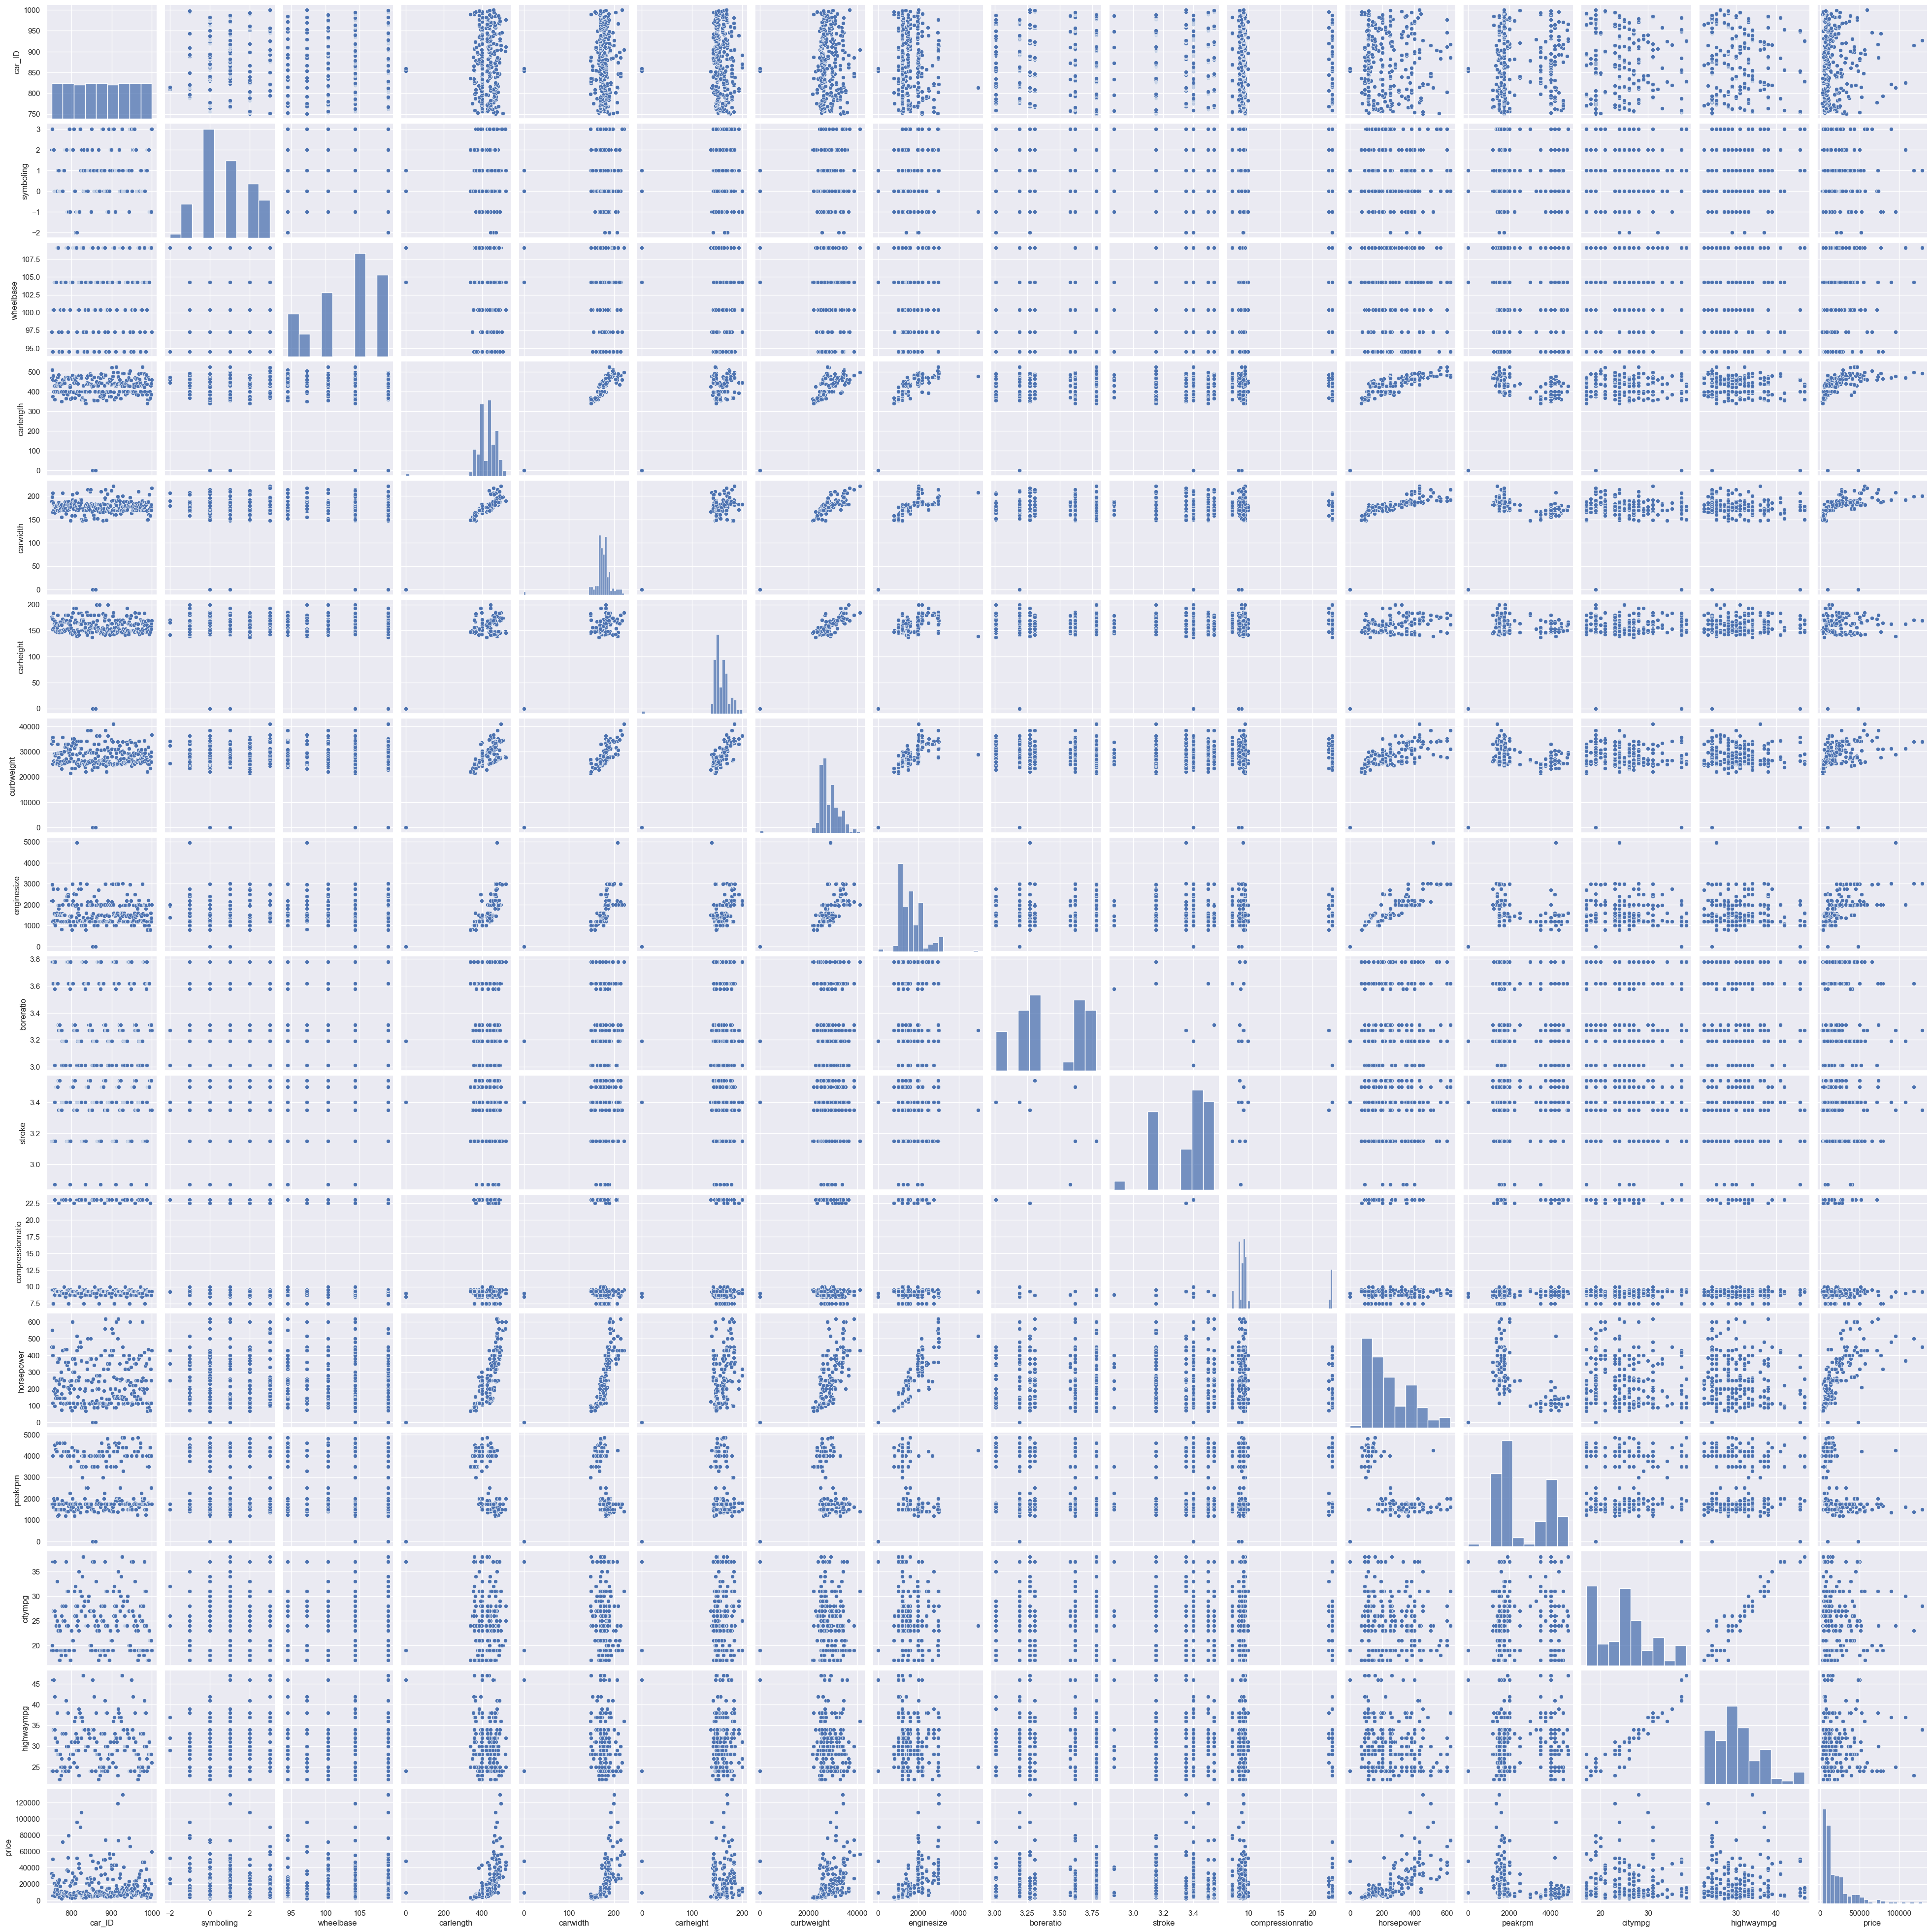

In [7]:
# Ejemplo 1 - Visualizar los datos utilizando Pairplots de seaborn.

g = sns.pairplot(raw_data)



C:\Users\jimen\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


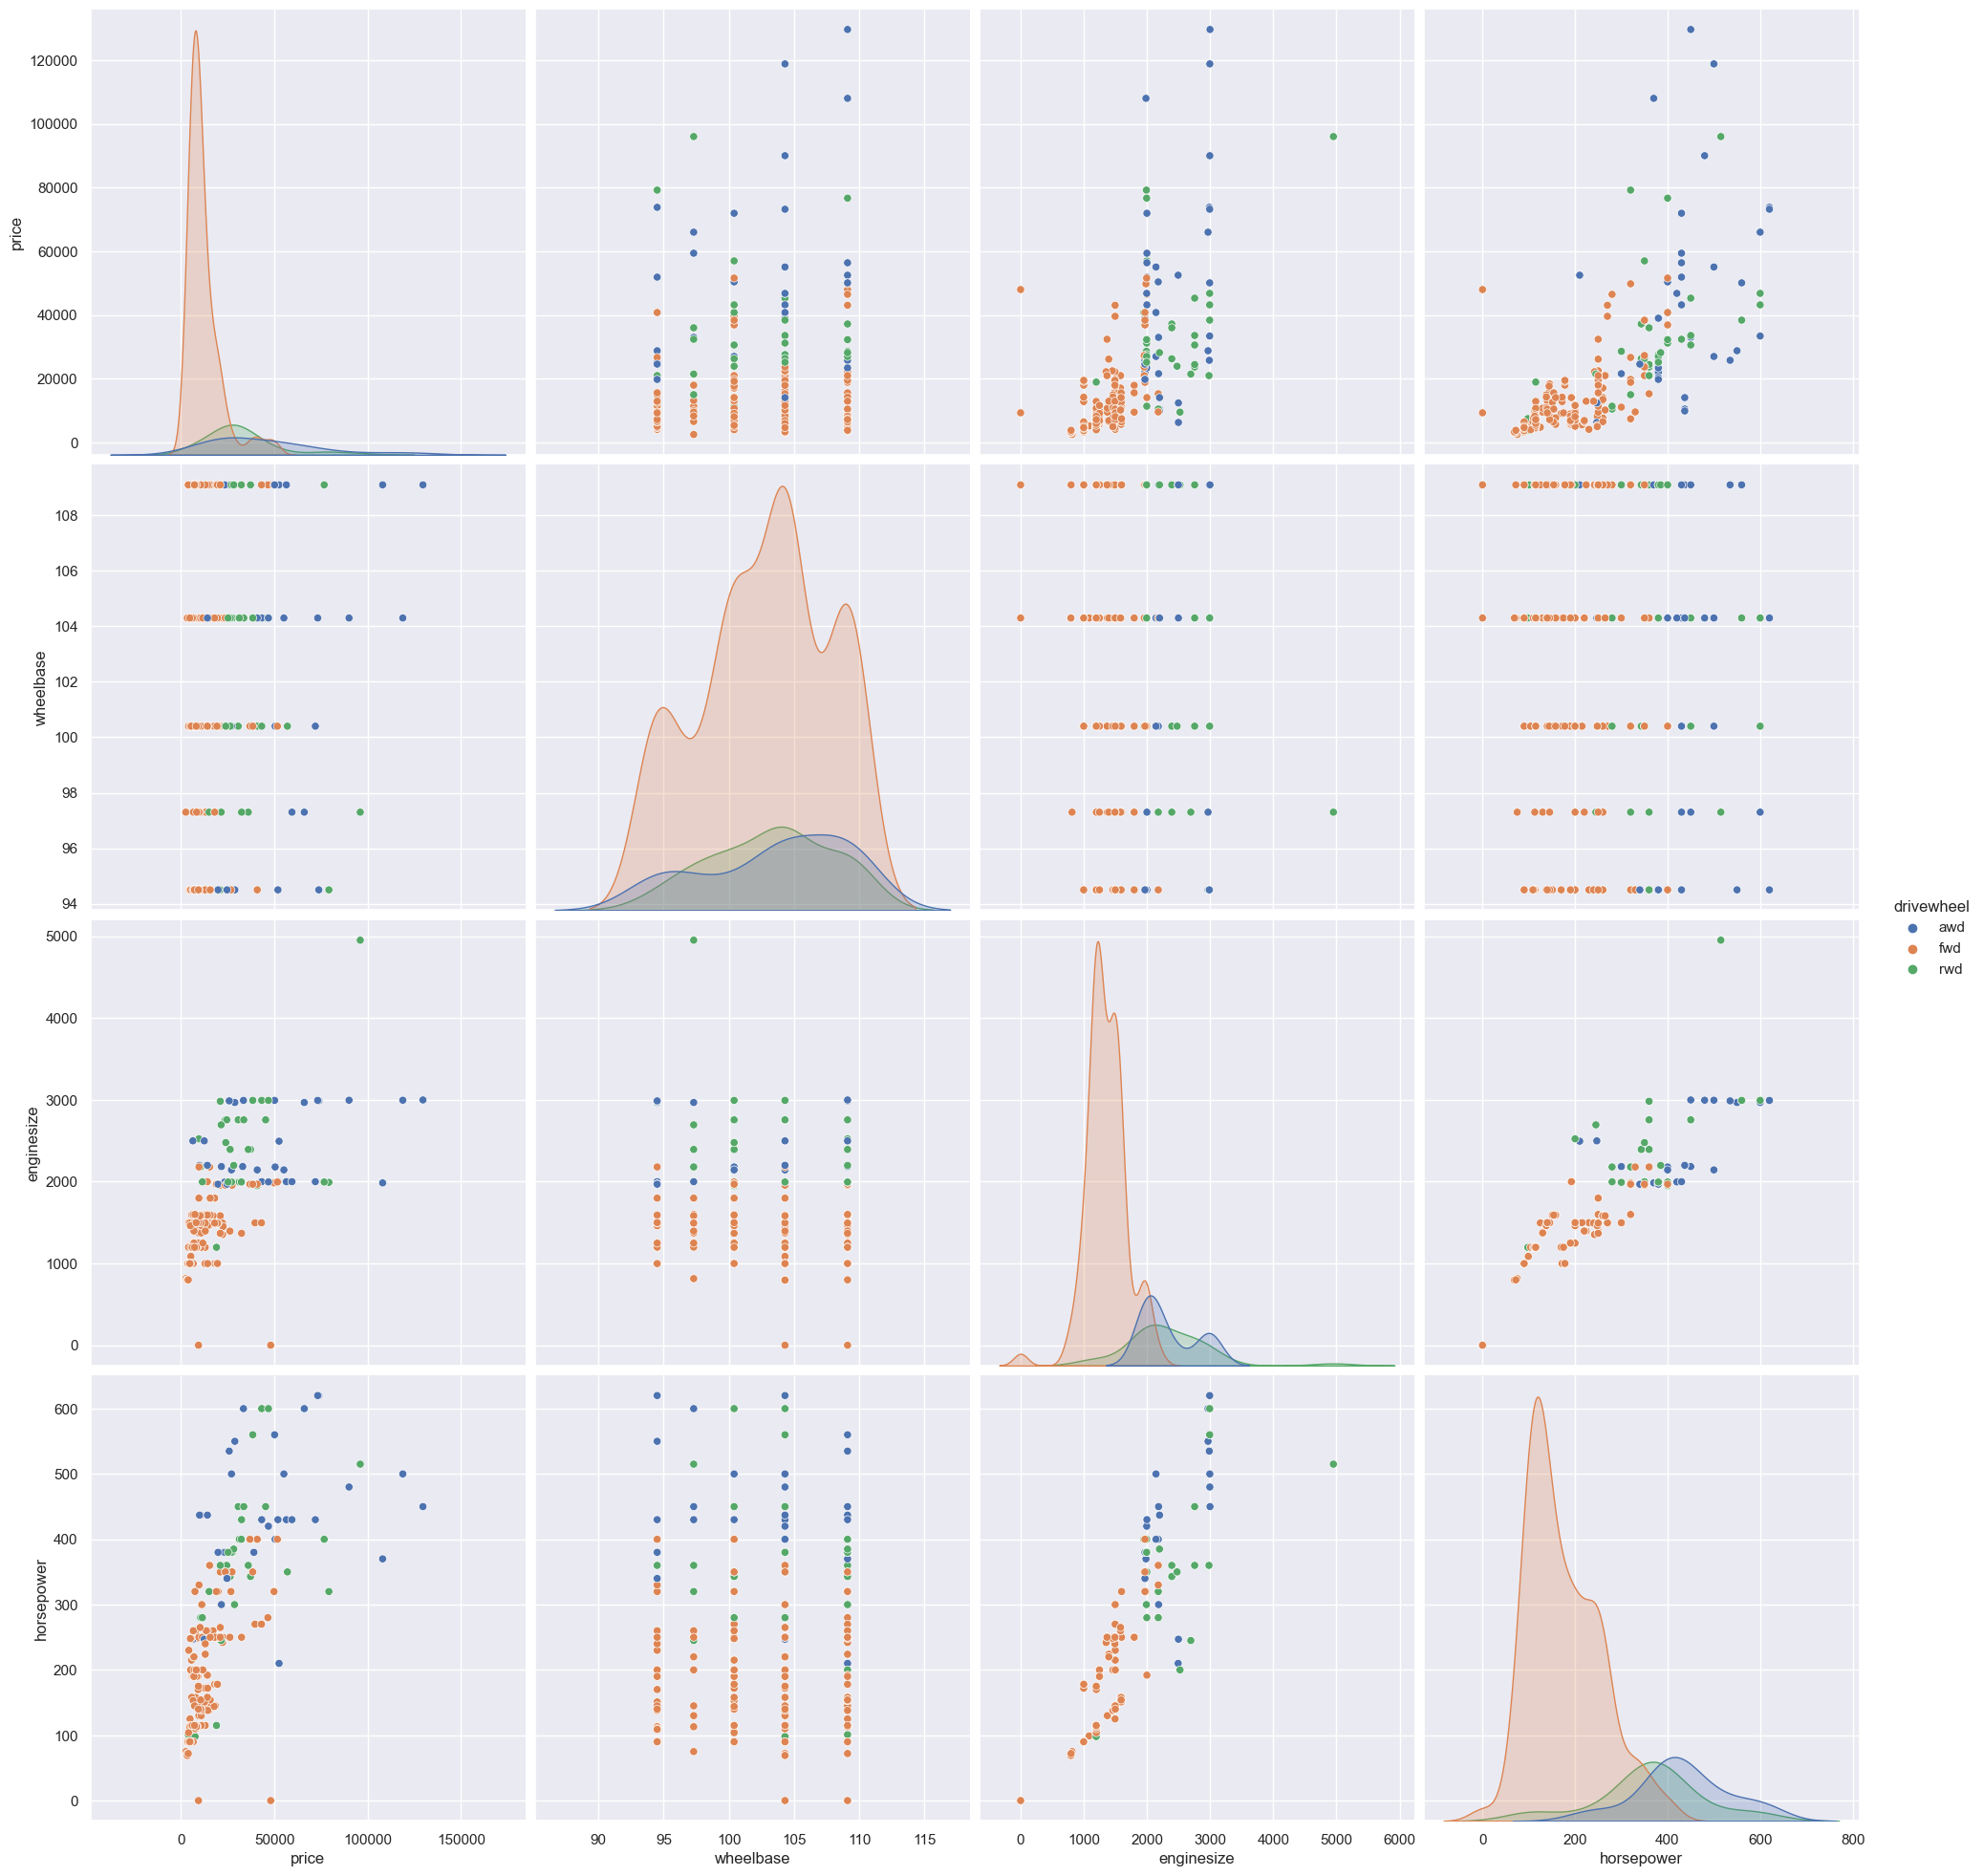

In [8]:
# Ejemplo 2 - Visualizando un subconjunto de nuestros datos: características importantes
g = sns.pairplot(raw_data[['price', 'wheelbase', 'enginesize','horsepower','drivewheel']], hue = 'drivewheel', height = 5)

C:\Users\jimen\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


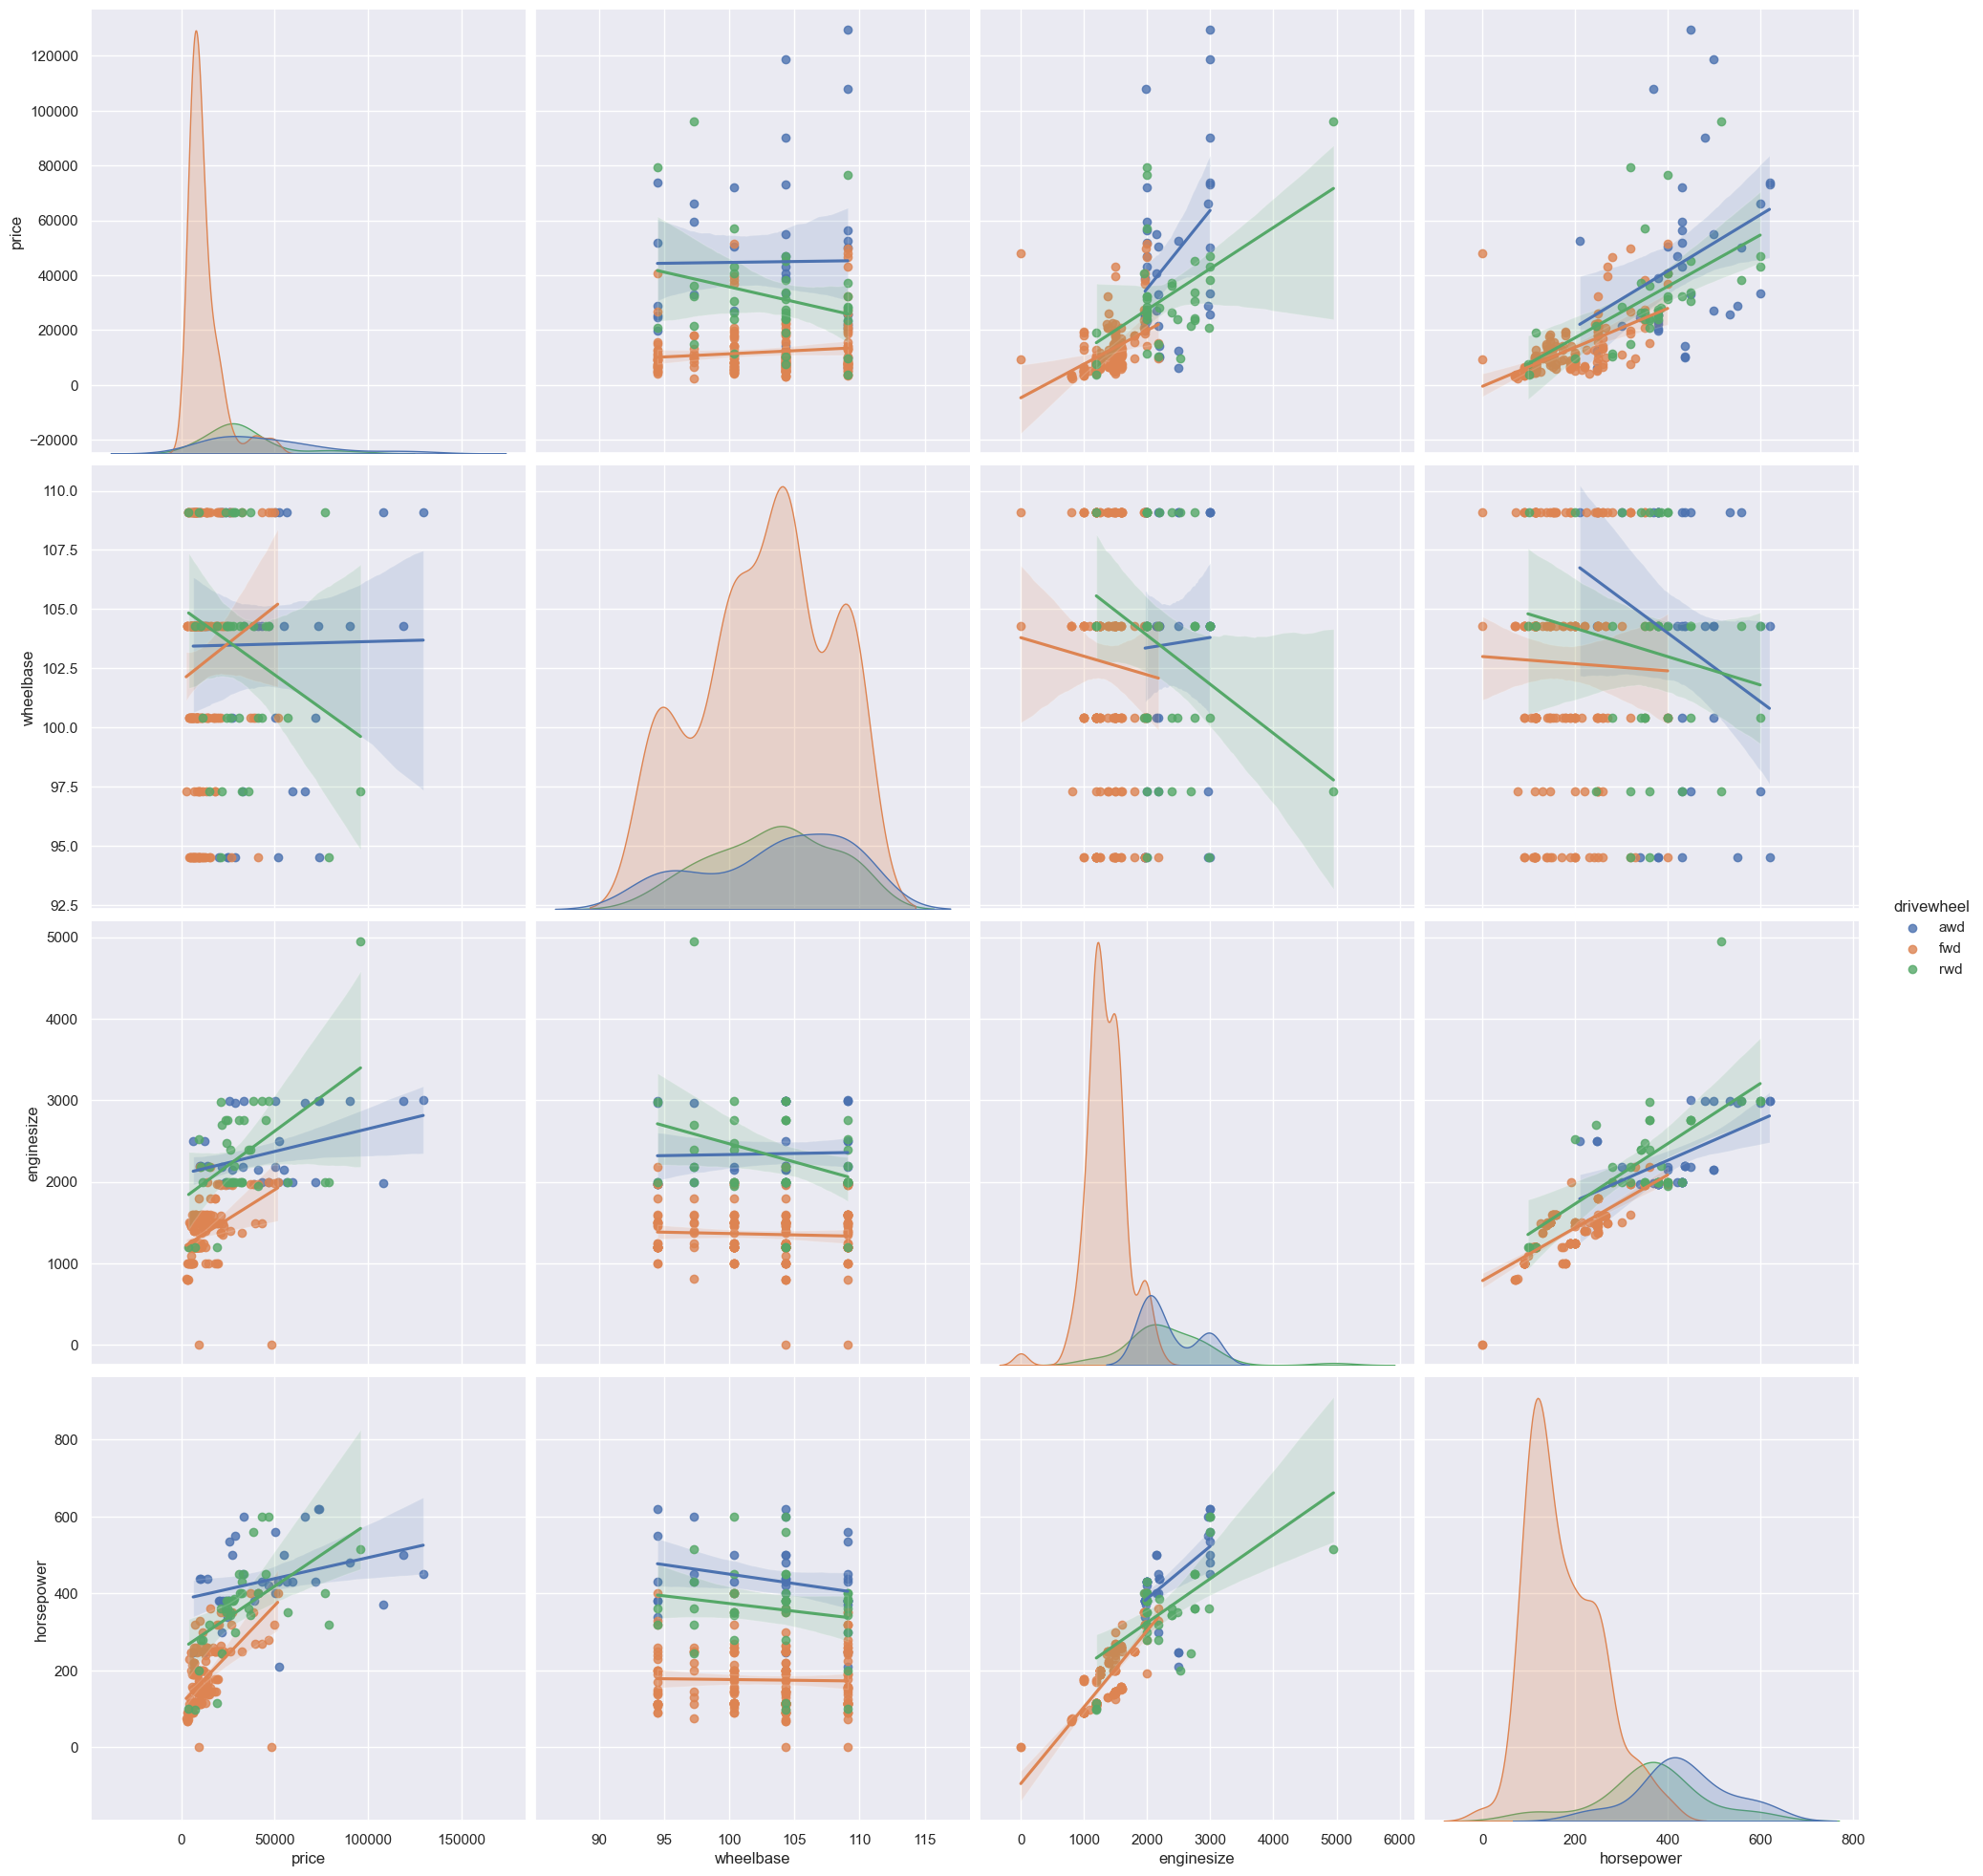

In [9]:
# Ejemplo 3 - Visualizando un subconjunto de nuestros datos: características importantes

g = sns.pairplot(raw_data[['price', 'wheelbase', 'enginesize','horsepower','drivewheel']], hue = 'drivewheel', height = 5, kind="reg")

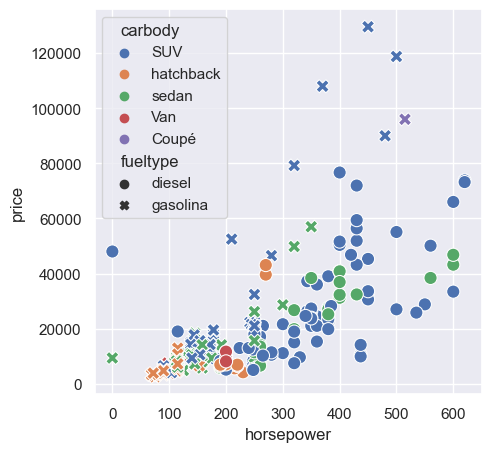

In [10]:
#Ejemplo 4 - Relación entre el precio y la potencia en caballos de fuerza por tipo de carrocería
ax = sns.scatterplot(x="horsepower", y="price", data=raw_data, hue = 'carbody', style = 'fueltype', s=90)

# Indagando en los datos categóricos.

carbody         price
0      Coupé  96000.000000
1        SUV  27004.799600
2        Van   8571.426857
3  hatchback   7476.427714
4      sedan  17032.000000

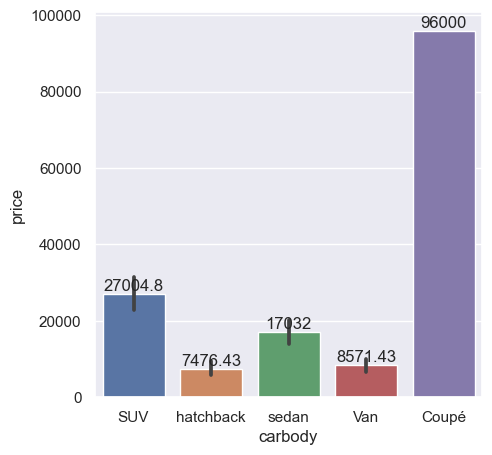

In [11]:
# Ejemplo 5 - Precio promedio por tipo de carrocería

ax = sns.barplot(x="carbody", y="price", data=raw_data)
ax.bar_label(ax.containers[0])

# Notas: 
#Las líneas muestran el rango de certeza.
# Utiliza el promedio como punto de referencia predeterminado.

raw_data[['carbody', 'price']].groupby('carbody', as_index = False).agg({'price':'mean'})

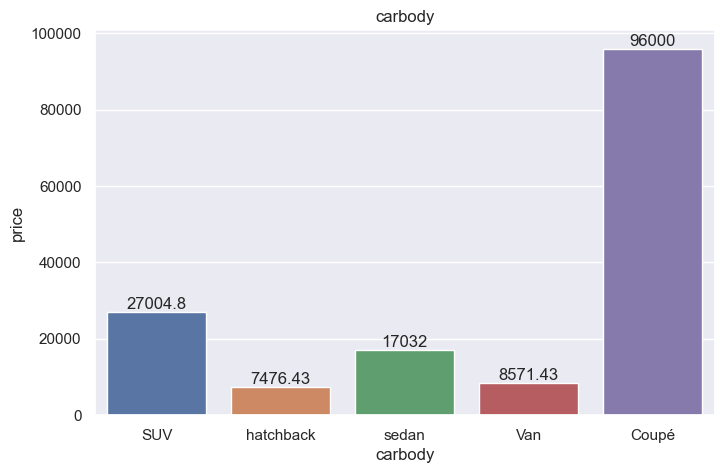

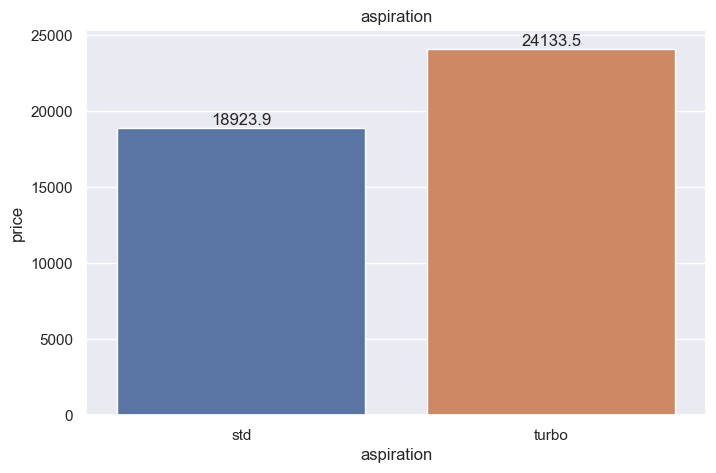

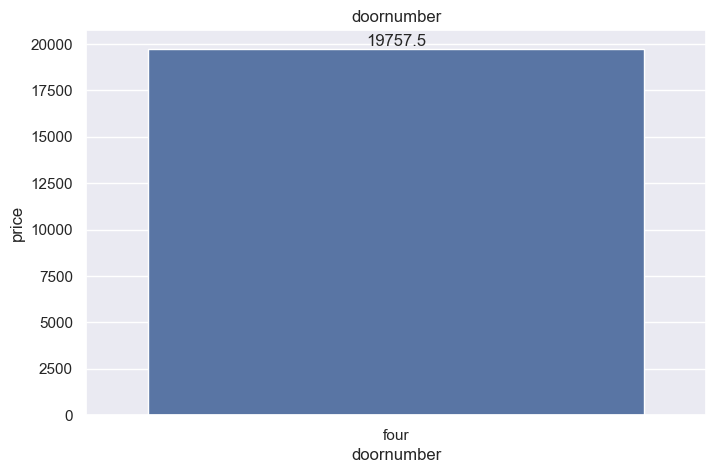

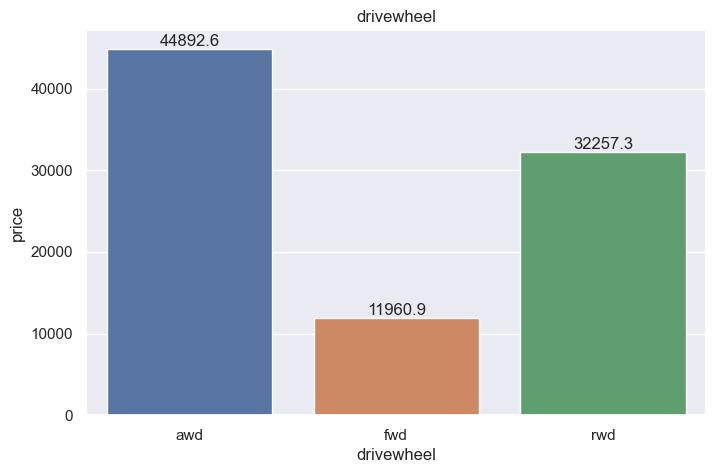

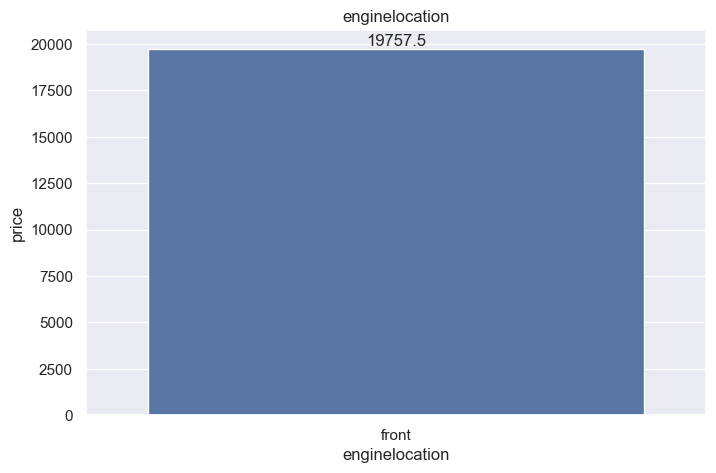

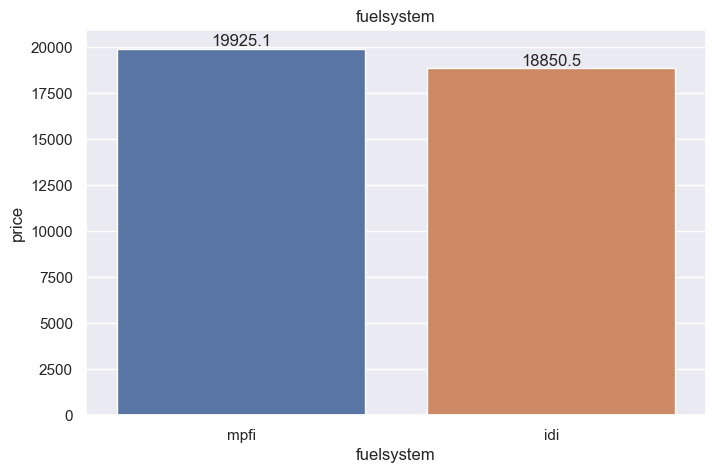

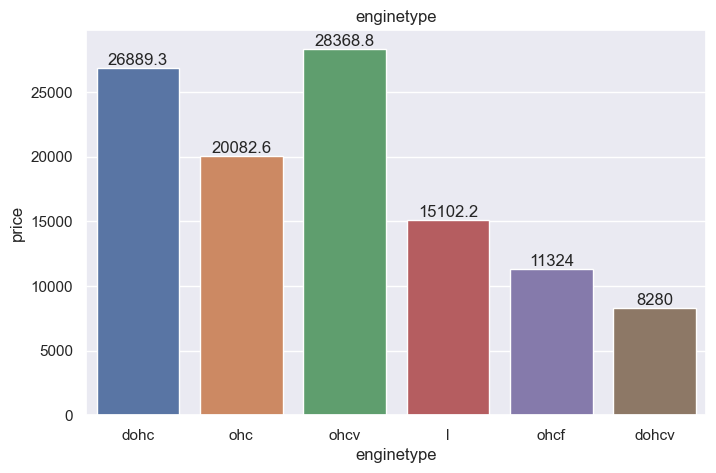

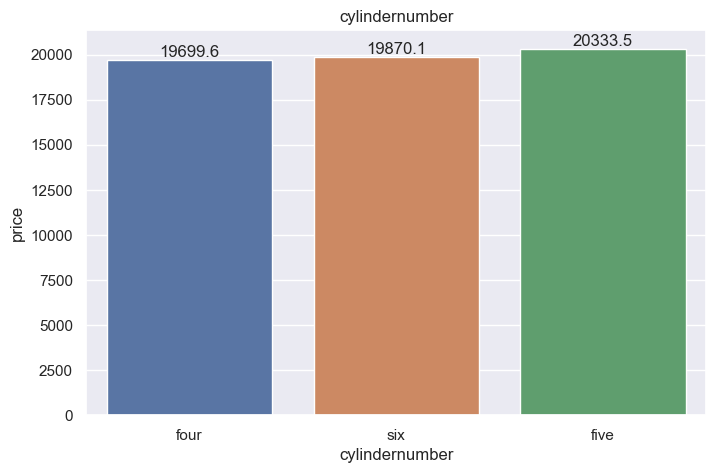

In [12]:
# Ejemplo 6 - Precio total por tipo de carrocería para múltiples categorías

categories = ['carbody', 'aspiration','doornumber','drivewheel','enginelocation', 'fuelsystem', 'enginetype','cylindernumber']

# Aumenta el tamaño de los gráficos de sns
sns.set(rc={'figure.figsize':(8,5)})

for c in categories:
    
    ax = sns.barplot(x=c, y="price", data=raw_data, ci=False) #, hue = 'fueltype')
    for container in ax.containers:
        ax.bar_label(container)
    plt.title(c)
    plt.show()

# Indagando en las distribuciones con gráficos de distribución.

C:\Users\jimen\AppData\Local\Temp\ipykernel_22896\1574371017.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'green');


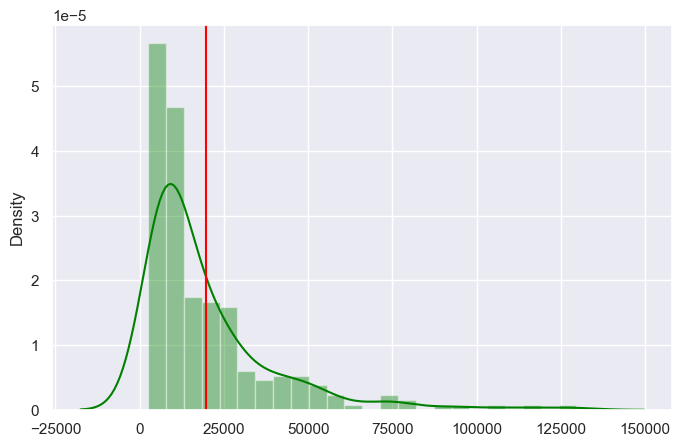

In [13]:
# Ejemplo 7 - Investigando la distribución del precio, añadiendo la media

x = raw_data['price'].values

sns.distplot(x, color = 'green');

# Calcular la media
mean = raw_data['price'].mean()

#Graficando
plt.axvline(mean, 0,1, color = 'red')

C:\Users\jimen\AppData\Local\Temp\ipykernel_22896\1946812060.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'green');


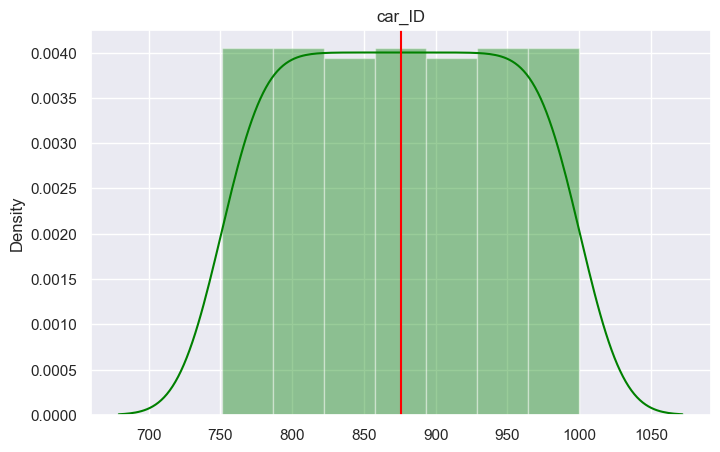

C:\Users\jimen\AppData\Local\Temp\ipykernel_22896\1946812060.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'green');


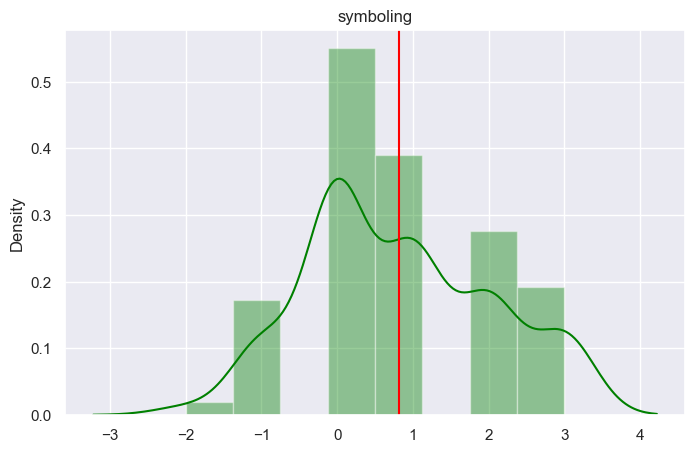

C:\Users\jimen\AppData\Local\Temp\ipykernel_22896\1946812060.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'green');


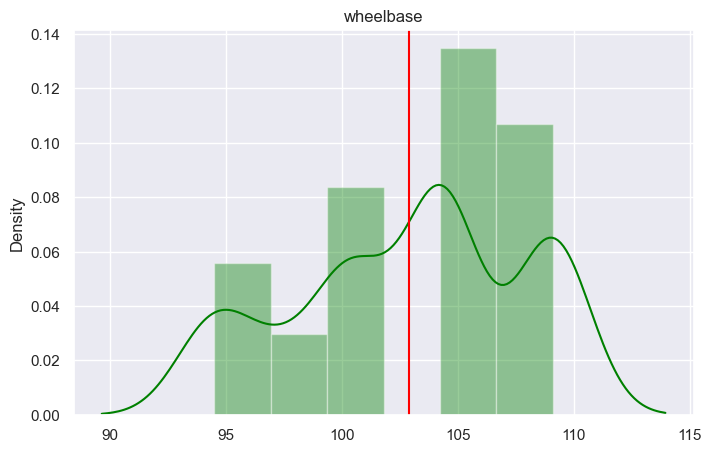

C:\Users\jimen\AppData\Local\Temp\ipykernel_22896\1946812060.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'green');


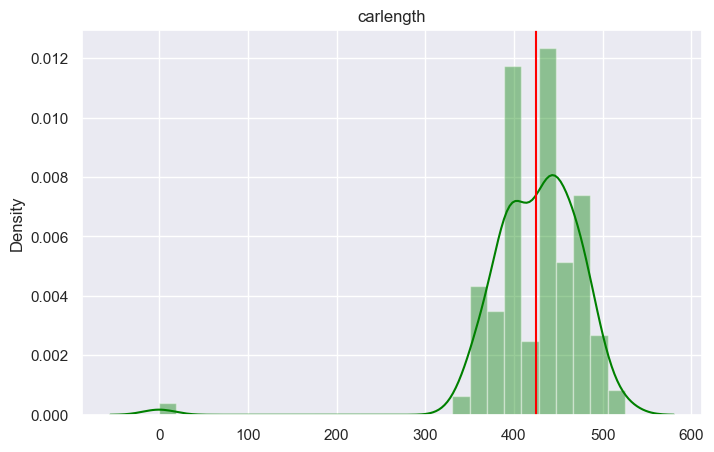

C:\Users\jimen\AppData\Local\Temp\ipykernel_22896\1946812060.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'green');


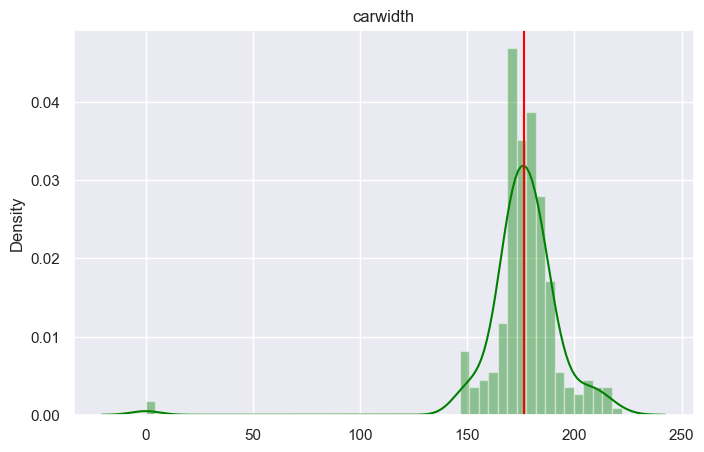

C:\Users\jimen\AppData\Local\Temp\ipykernel_22896\1946812060.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'green');


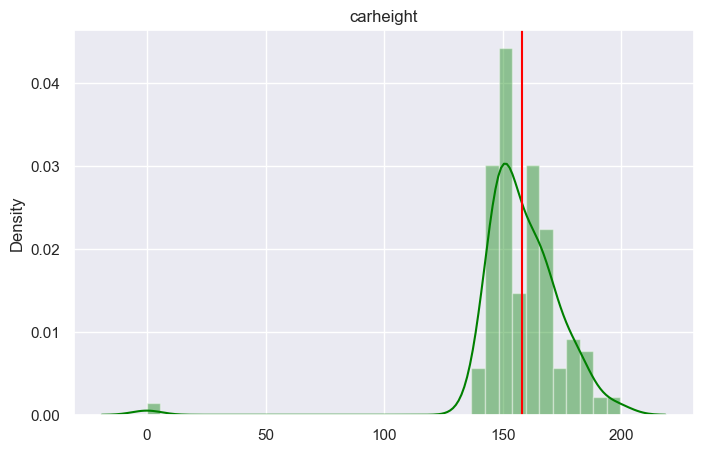

C:\Users\jimen\AppData\Local\Temp\ipykernel_22896\1946812060.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'green');


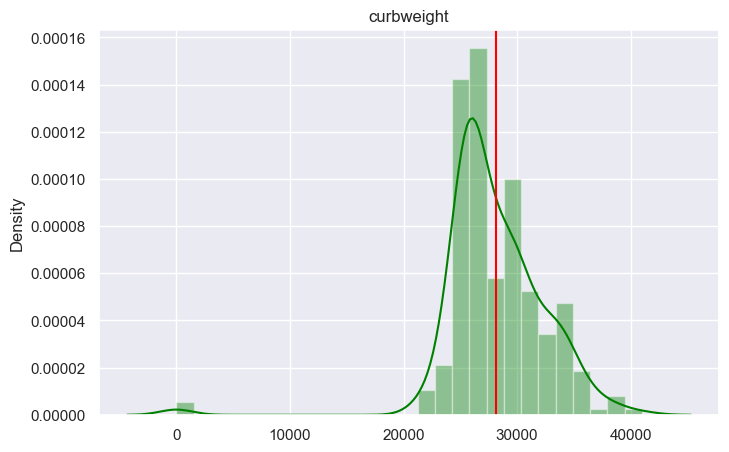

C:\Users\jimen\AppData\Local\Temp\ipykernel_22896\1946812060.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'green');


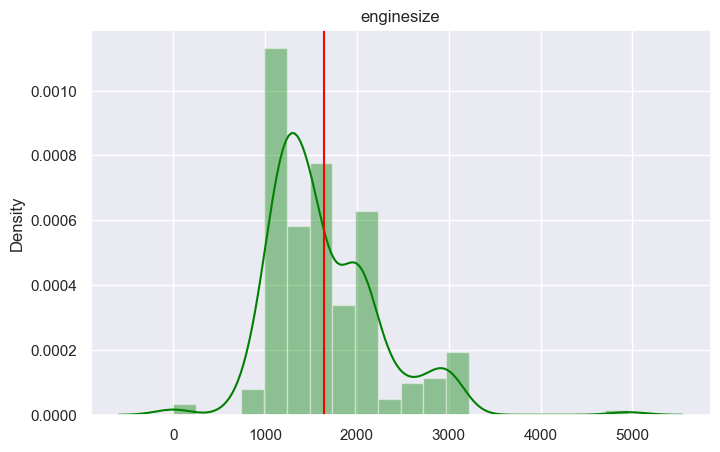

C:\Users\jimen\AppData\Local\Temp\ipykernel_22896\1946812060.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'green');


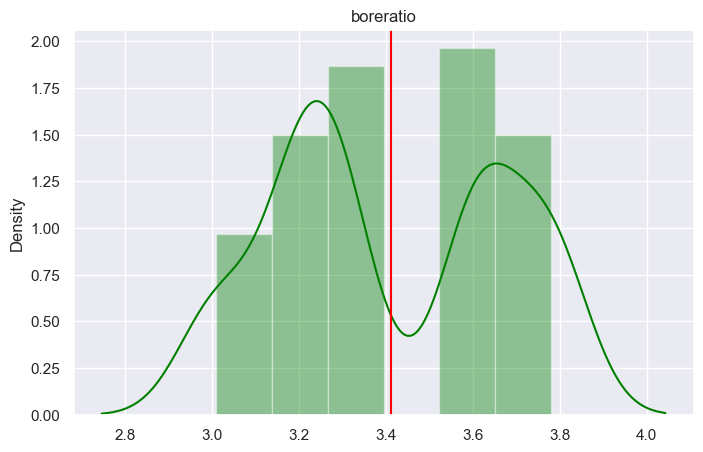

C:\Users\jimen\AppData\Local\Temp\ipykernel_22896\1946812060.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'green');


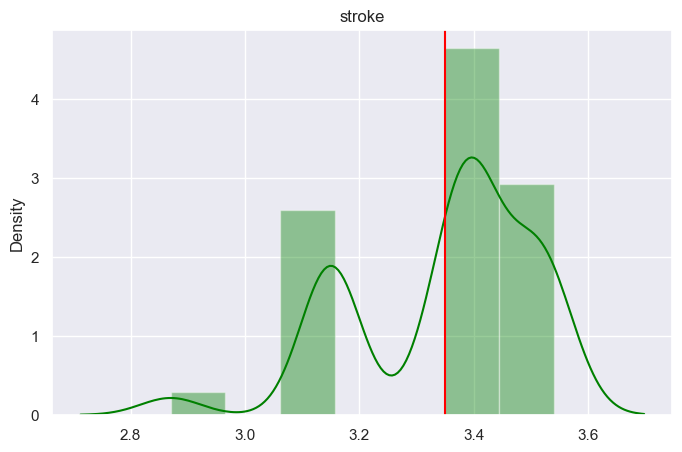

C:\Users\jimen\AppData\Local\Temp\ipykernel_22896\1946812060.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'green');


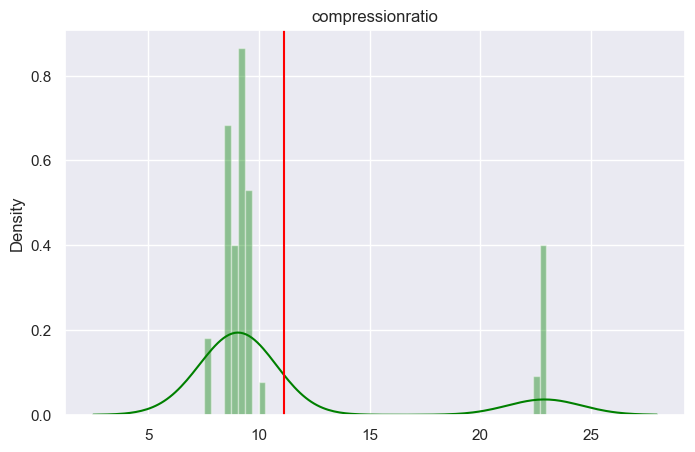

C:\Users\jimen\AppData\Local\Temp\ipykernel_22896\1946812060.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'green');


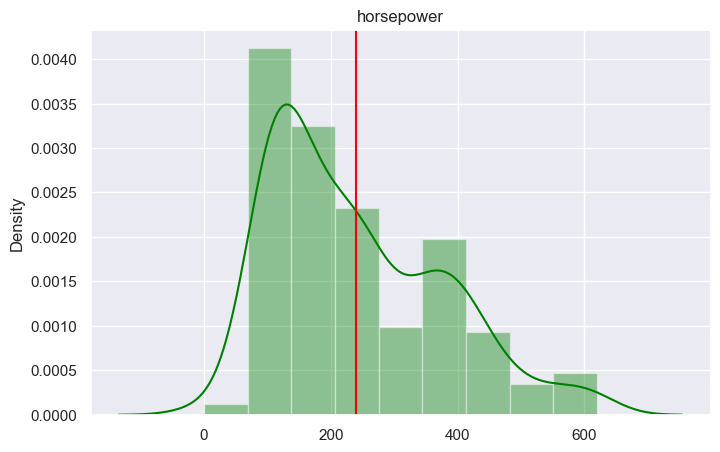

C:\Users\jimen\AppData\Local\Temp\ipykernel_22896\1946812060.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'green');


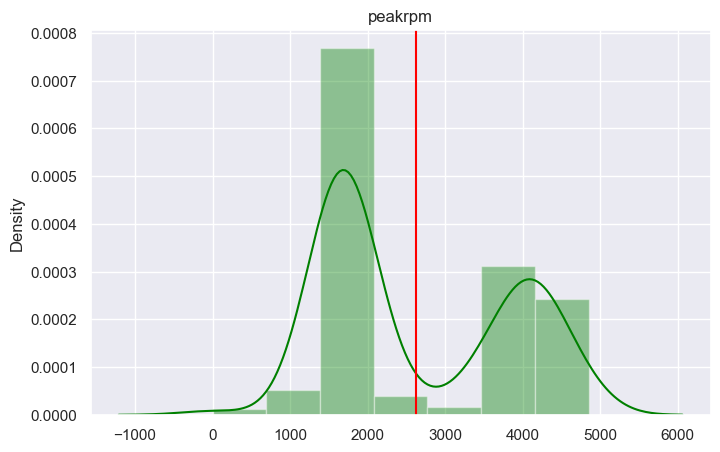

C:\Users\jimen\AppData\Local\Temp\ipykernel_22896\1946812060.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'green');


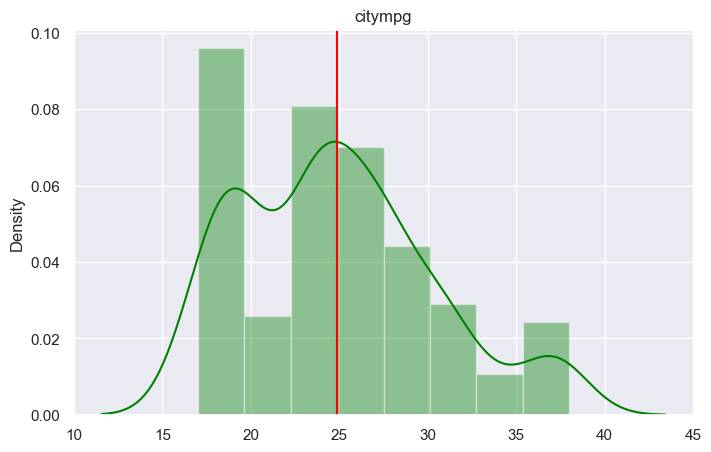

C:\Users\jimen\AppData\Local\Temp\ipykernel_22896\1946812060.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'green');


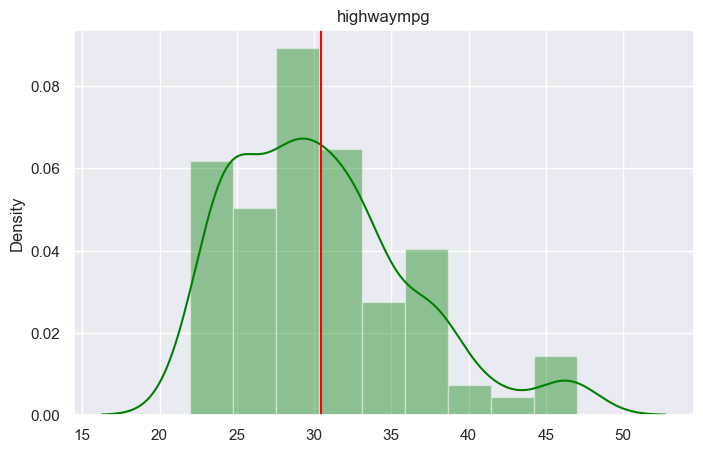

C:\Users\jimen\AppData\Local\Temp\ipykernel_22896\1946812060.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'green');


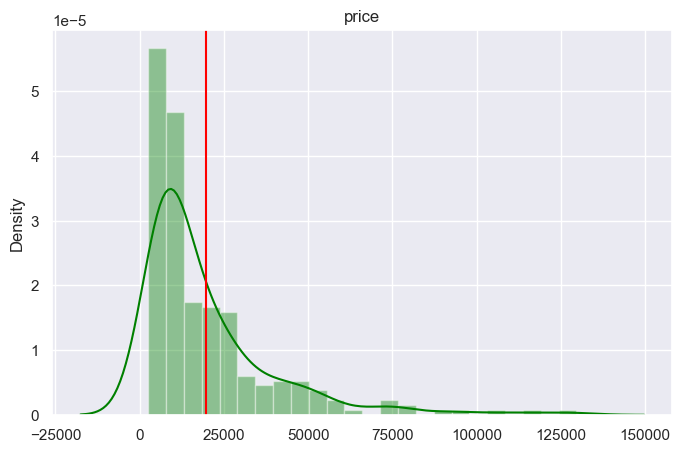

In [14]:
# Ejemplo 8 - Investigando la distribución de todos los campos, añadiendo la media

#Identificando todas las columnas numéricas
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
n_variables = raw_data.select_dtypes(include=numerics).columns

# Aumenta el tamaño de los gráficos de sns.
sns.set(rc={'figure.figsize':(8,5)})


for n in n_variables:
    x = raw_data[n].values
    sns.distplot(x, color = 'green');

    # Calcular Media
    mean = raw_data[n].mean()

    #Graficando
    plt.axvline(mean, 0,1, color = 'red')
    plt.title(n)
    plt.show()

In [15]:
n_variables

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

# Indagando en la distribución y los valores atípicos con diagramas de Box plots .

The meadian is:  11160.0


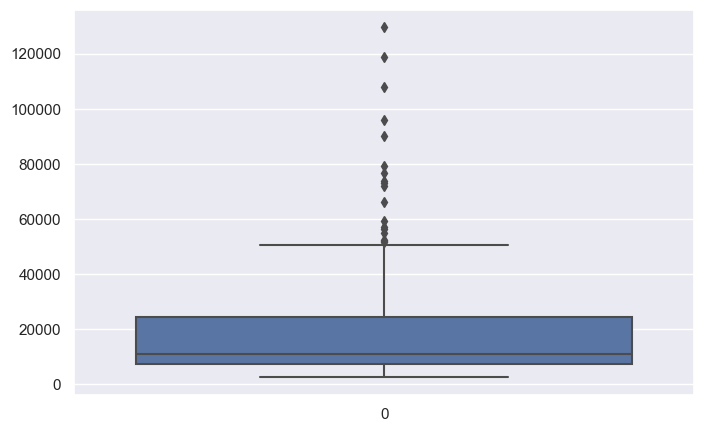

In [16]:
# Ejemplo 9 - Investigando la distribución del precio

x = raw_data['price'].values
ax = sns.boxplot(x)

print('The meadian is: ', raw_data['price'].median())

# Notes:
# La línea representa el valor central, es decir, la mediana.
#El rectángulo en el centro indica el comienzo del primer cuartil (25º percentil) y el final del tercer cuartil (75º percentil).
#Las líneas exteriores, de izquierda a derecha, muestran el cuartil mínimo y el cuartil máximo.
#Los puntos en el extremo derecho se refieren a "valores atípicos".

The meadian is:  875.5


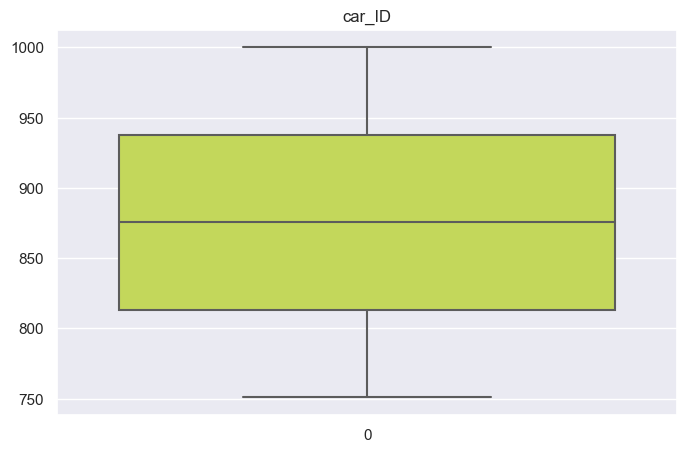

The meadian is:  1.0


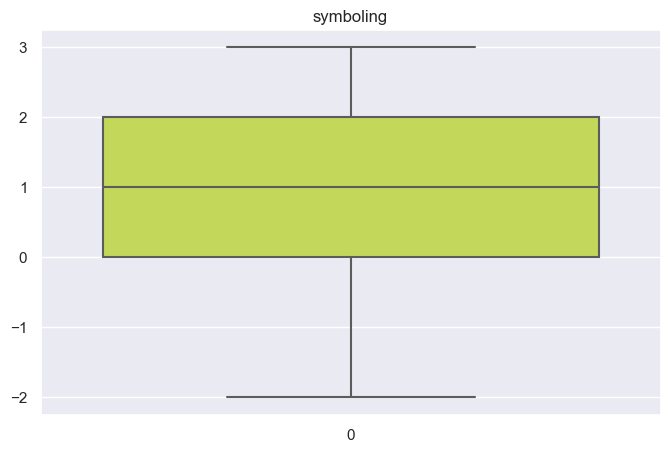

The meadian is:  104.3


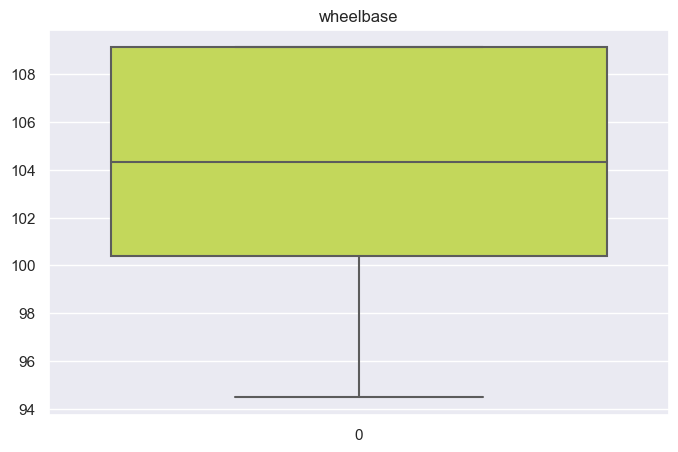

The meadian is:  431.5


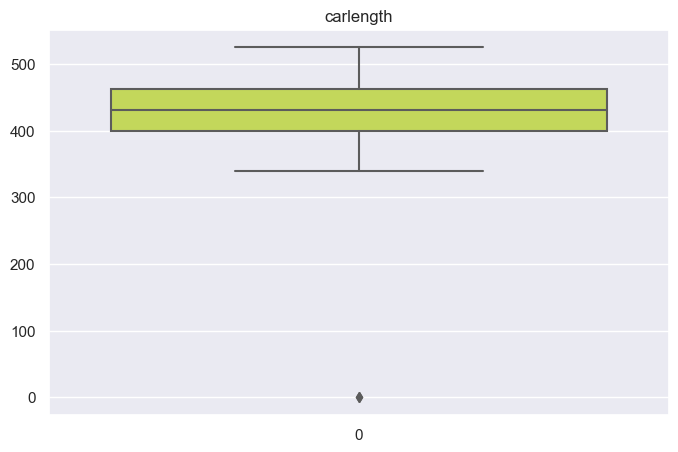

The meadian is:  177.0


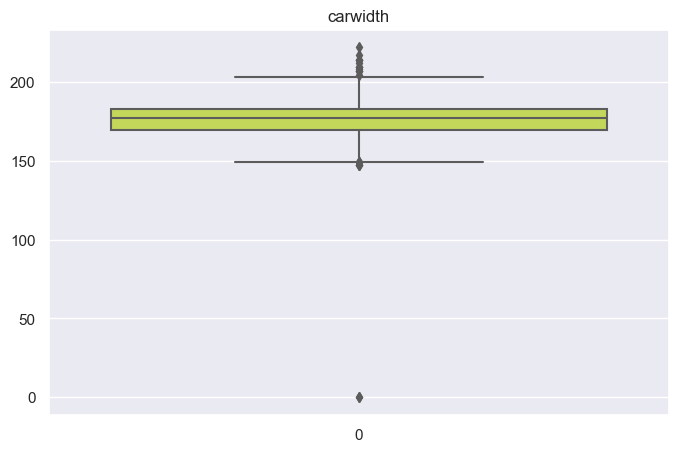

The meadian is:  155.5


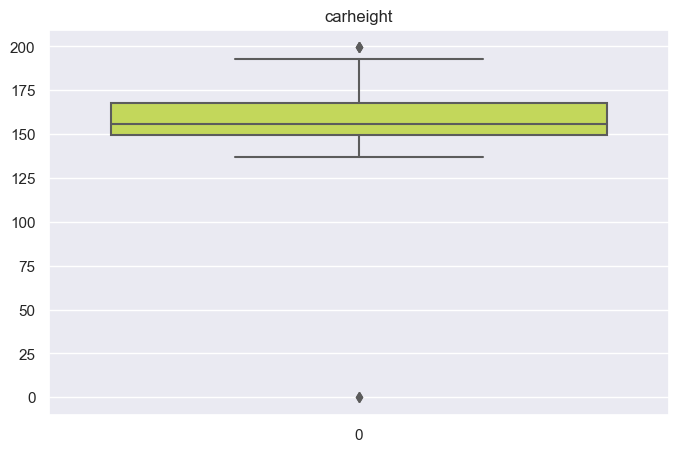

The meadian is:  27200.85


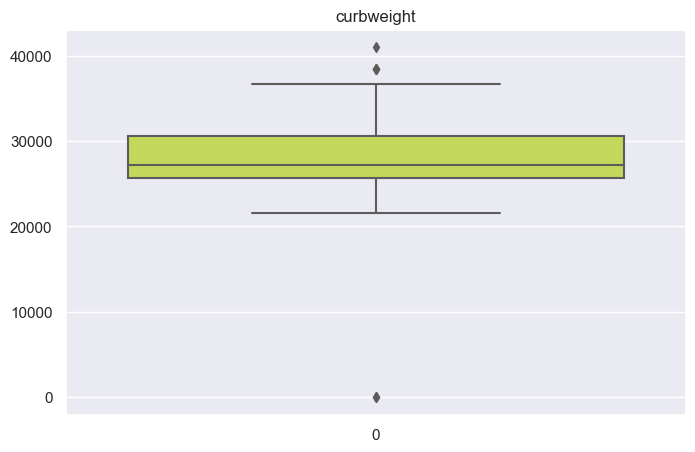

The meadian is:  1497.0


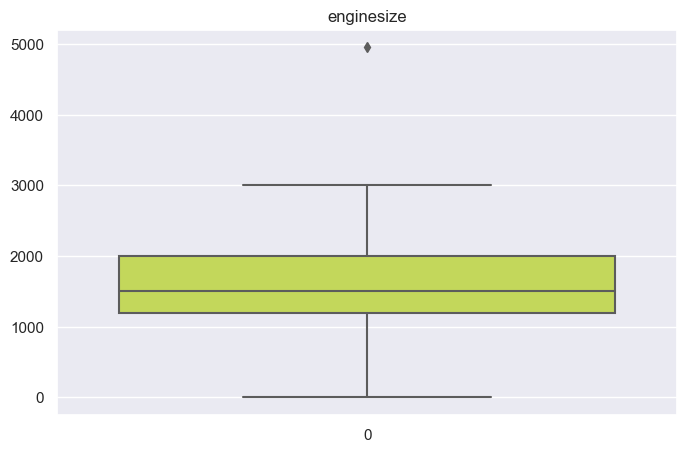

The meadian is:  3.31


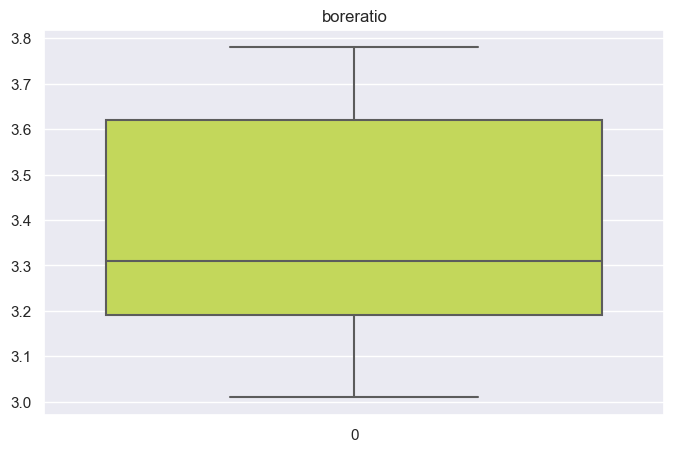

The meadian is:  3.4


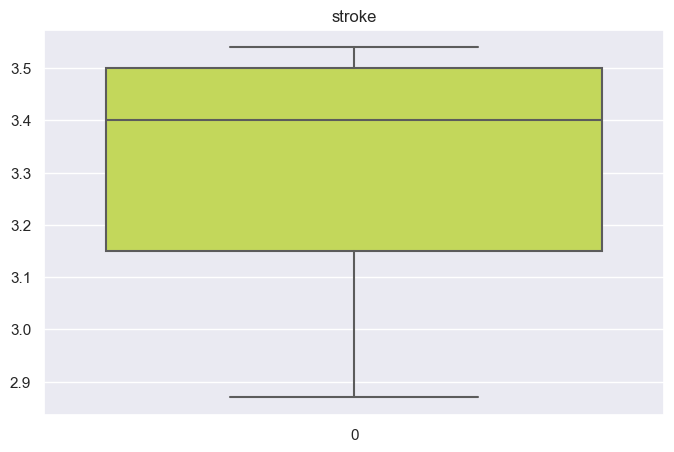

The meadian is:  9.3


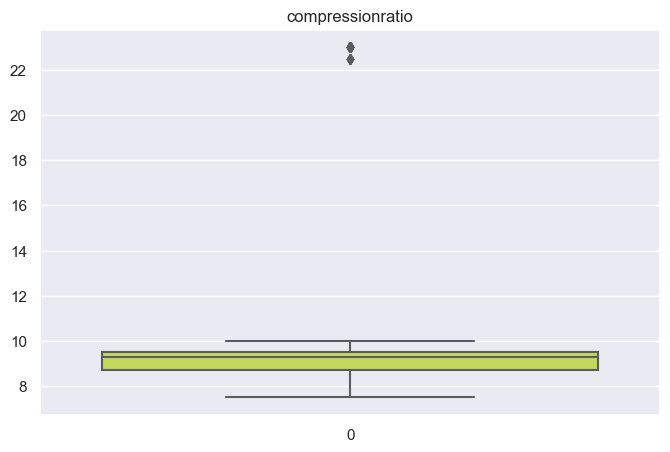

The meadian is:  200.0


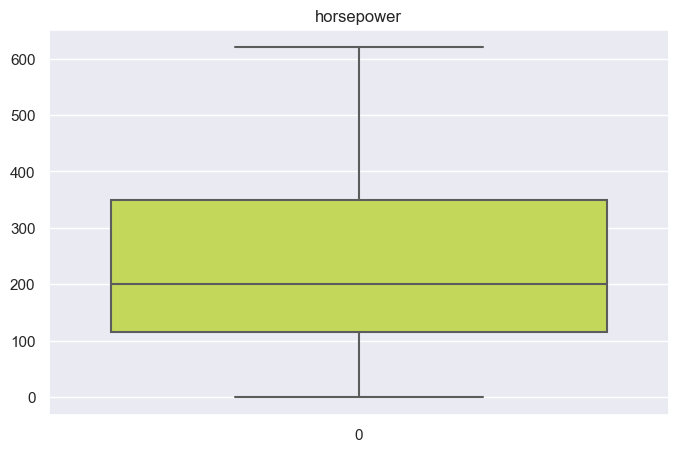

The meadian is:  1900.0


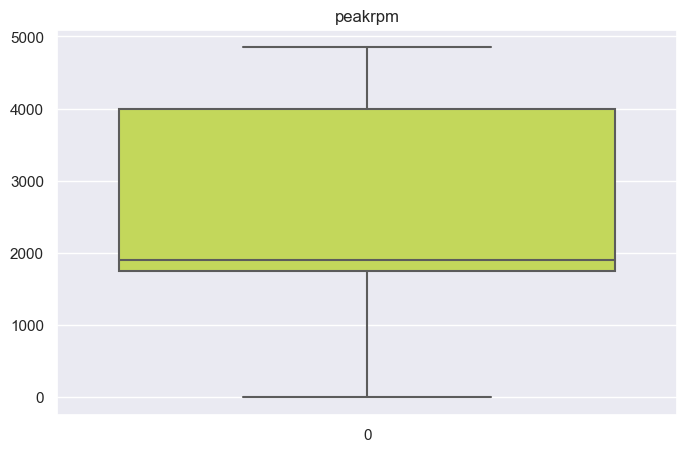

The meadian is:  24.0


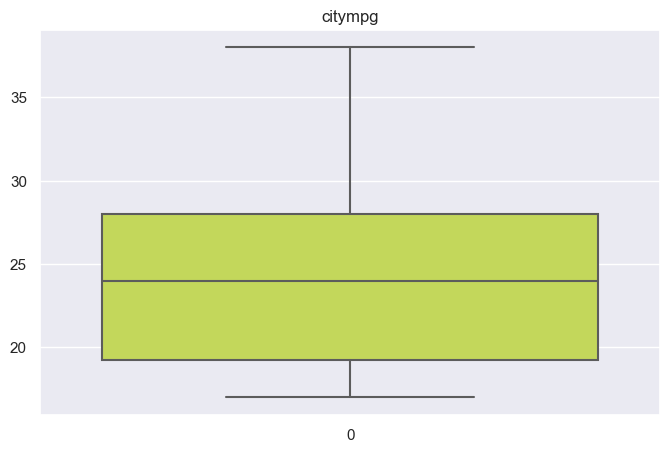

The meadian is:  30.0


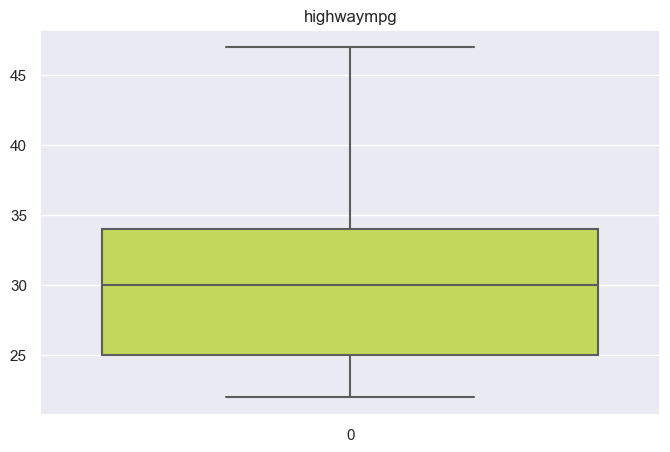

The meadian is:  11160.0


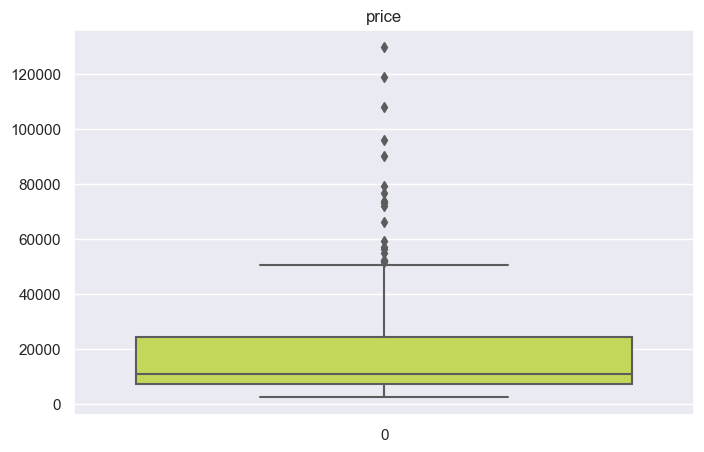

In [17]:
#Ejemplo 10 - Investigando la distribución de todos los valores numéricos
# Aumenta el tamaño de los gráficos de sns.
sns.set(rc={'figure.figsize':(8,5)})

for c in n_variables:    
    x = raw_data[c].values
    ax = sns.boxplot(x, color = '#D1EC46')
    print('The meadian is: ', raw_data[c].median())
    plt.title(c)
    plt.show()

C:\Users\jimen\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 28.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


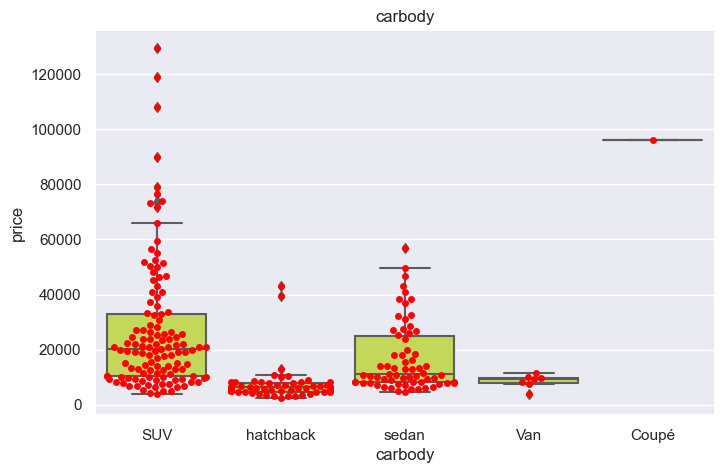

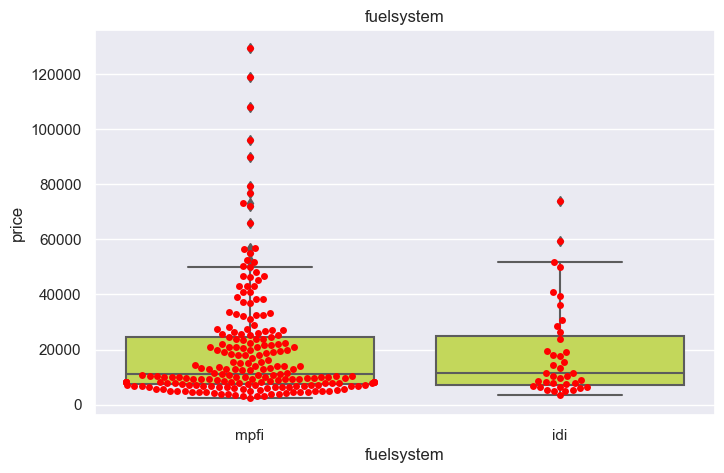

C:\Users\jimen\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 21.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


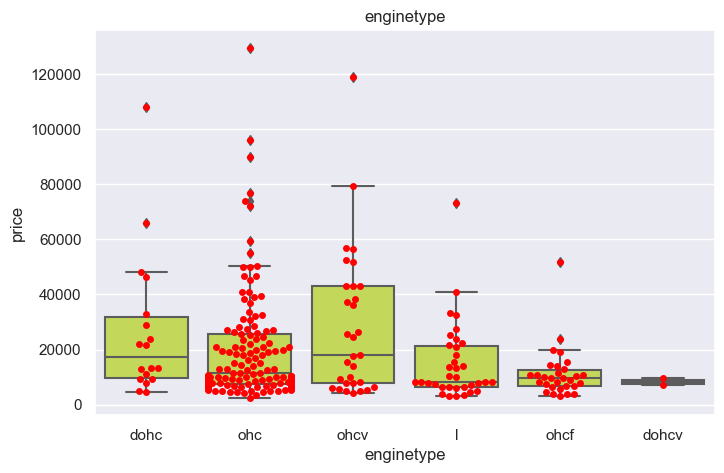

C:\Users\jimen\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 12.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


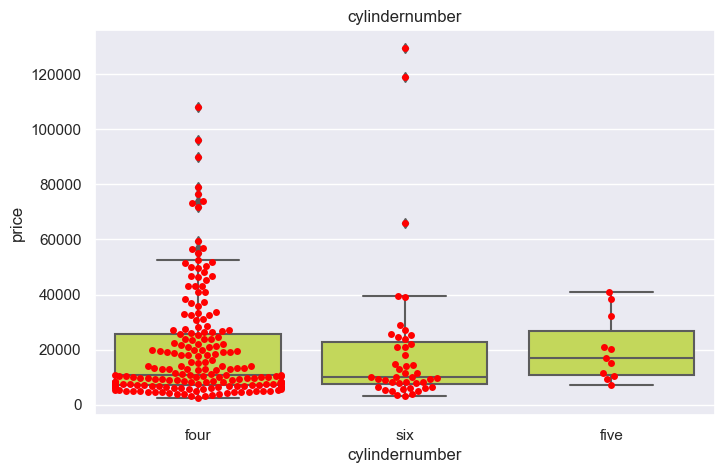

In [18]:
#Ejemplo 11 - Investigando la distribución del precio por variables categóricas - por puntos de datos

categories = ['carbody','fuelsystem', 'enginetype','cylindernumber']

# Aumenta el tamaño de los gráficos de sns.
sns.set(rc={'figure.figsize':(8,5)})

for c in categories:
    ax = sns.boxplot(x=c, y="price", data=raw_data, color = '#D1EC46')
    ax = sns.swarmplot(x=c, y="price", data=raw_data, color="red")
    plt.title(c)
    plt.show()


# Convertir los valores categóricos en representación numérica.

In [19]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [20]:
raw_data.head()

car_ID  symboling                                            CarName  \
0     751          2  Mahindra-XUV700 AX 7 diesel AT AWD Luxury Pack...   
1     752          3             Audi-Q7 35 TDI Premium + Sunroof - 957   
2     753          2  Hyundai-Grand i10 Magna 1.2 Kappa VTVT [2013-2...   
3     754          2      Land Rover-Discovery Sport HSE 7-Seater - 959   
4     755          2       Toyota-Fortuner 2.8 4x2 AT [2016-2020] - 960   

   fueltype aspiration doornumber    carbody drivewheel enginelocation  \
0    diesel        std       four        SUV        awd          front   
1    diesel        std       four        SUV        awd          front   
2  gasolina        std       four  hatchback        fwd          front   
3    diesel        std       four        SUV        awd          front   
4    diesel        std       four        SUV        rwd          front   

   wheelbase  carlength  carwidth  carheight  curbweight enginetype  \
0       97.3      469.5     189.0      175.5    33169.50       dohc   
1       94.5      508.9     198.3      173.7    34444.71       dohc   
2       94.5      376.5     166.0      152.0    25232.00        ohc   
3      100.4      460.0     206.9      172.4    35669.56        ohc   
4      100.4      479.5     185.5      183.5    34039.25        ohc   

  cylindernumber  enginesize fuelsystem  boreratio  stroke  compressionratio  \
0           four        2184       mpfi       3.78    3.15               9.5   
1            six        2967       mpfi       3.78    3.15               9.5   
2            six        1197        idi       3.78    3.15               9.5   
3           four        2179       mpfi       3.62    3.15               7.5   
4           four        2755        idi       3.62    3.15               7.5   

   horsepower  peakrpm  citympg  highwaympg    price  
0         450     1750       19          24  33000.0  
1         550     1750       20          24  28800.0  
2         114     4000       19          24   5940.0  
3         400     1750       37          46  50400.0  
4         450     1600       27          34  30600.0

In [21]:
# Convertir las variables categóricas en representación numérica.

new_raw_data = pd.get_dummies(raw_data, columns = ['carbody', 'aspiration','doornumber','drivewheel','enginelocation', 'fuelsystem', 'enginetype', 'fueltype'], dtype=int)
new_raw_data.head()

car_ID  symboling                                            CarName  \
0     751          2  Mahindra-XUV700 AX 7 diesel AT AWD Luxury Pack...   
1     752          3             Audi-Q7 35 TDI Premium + Sunroof - 957   
2     753          2  Hyundai-Grand i10 Magna 1.2 Kappa VTVT [2013-2...   
3     754          2      Land Rover-Discovery Sport HSE 7-Seater - 959   
4     755          2       Toyota-Fortuner 2.8 4x2 AT [2016-2020] - 960   

   wheelbase  carlength  carwidth  carheight  curbweight cylindernumber  \
0       97.3      469.5     189.0      175.5    33169.50           four   
1       94.5      508.9     198.3      173.7    34444.71            six   
2       94.5      376.5     166.0      152.0    25232.00            six   
3      100.4      460.0     206.9      172.4    35669.56           four   
4      100.4      479.5     185.5      183.5    34039.25           four   

   enginesize  boreratio  stroke  compressionratio  horsepower  peakrpm  \
0        2184       3.78    3.15               9.5         450     1750   
1        2967       3.78    3.15               9.5         550     1750   
2        1197       3.78    3.15               9.5         114     4000   
3        2179       3.62    3.15               7.5         400     1750   
4        2755       3.62    3.15               7.5         450     1600   

   citympg  highwaympg    price  carbody_Coupé  carbody_SUV  carbody_Van  \
0       19          24  33000.0              0            1            0   
1       20          24  28800.0              0            1            0   
2       19          24   5940.0              0            0            0   
3       37          46  50400.0              0            1            0   
4       27          34  30600.0              0            1            0   

   carbody_hatchback  carbody_sedan  aspiration_std  aspiration_turbo  \
0                  0              0               1                 0   
1                  0              0               1                 0   
2                  1              0               1                 0   
3                  0              0               1                 0   
4                  0              0               1                 0   

   doornumber_four  drivewheel_awd  drivewheel_fwd  drivewheel_rwd  \
0                1               1               0               0   
1                1               1               0               0   
2                1               0               1               0   
3                1               1               0               0   
4                1               0               0               1   

   enginelocation_front  fuelsystem_idi  fuelsystem_mpfi  enginetype_dohc  \
0                     1               0                1                1   
1                     1               0                1                1   
2                     1               1                0                0   
3                     1               0                1                0   
4                     1               1                0                0   

   enginetype_dohcv  enginetype_l  enginetype_ohc  enginetype_ohcf  \
0                 0             0               0                0   
1                 0             0               0                0   
2                 0             0               1                0   
3                 0             0               1                0   
4                 0             0               1                0   

   enginetype_ohcv  fueltype_diesel  fueltype_gasolina  
0                0                1                  0  
1                0                1                  0  
2                0                0                  1  
3                0                1                  0  
4                0                1                  0

In [22]:
#Convertir variables categóricas en representación numérica.

new_raw_data = pd.get_dummies(raw_data, columns = ['carbody', 'aspiration','doornumber','drivewheel','enginelocation', 'fuelsystem', 'enginetype', 'fueltype'])

new_raw_data['cylindernumber'].loc[new_raw_data['cylindernumber'] == 'two'] = 2
new_raw_data['cylindernumber'].loc[new_raw_data['cylindernumber'] == 'three'] = 3
new_raw_data['cylindernumber'].loc[new_raw_data['cylindernumber'] == 'four'] = 4
new_raw_data['cylindernumber'].loc[new_raw_data['cylindernumber'] == 'five'] = 5
new_raw_data['cylindernumber'].loc[new_raw_data['cylindernumber'] == 'six'] = 6
new_raw_data['cylindernumber'].loc[new_raw_data['cylindernumber'] == 'eight'] = 8
new_raw_data['cylindernumber'].loc[new_raw_data['cylindernumber'] == 'twelve'] = 12
new_raw_data['cylindernumber'] = new_raw_data['cylindernumber'].astype(int)

warnings.simplefilter(action='ignore', category=FutureWarning)

new_raw_data.dtypes

C:\Users\jimen\AppData\Local\Temp\ipykernel_22896\1446254427.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_raw_data['cylindernumber'].loc[new_raw_data['cylindernumber'] == 'two'] = 2
C:\Users\jimen\AppData\Local\Temp\ipykernel_22896\1446254427.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_raw_data['cylindernumber'].loc[new_raw_data['cylindernumber'] == 'three'] = 3
C:\Users\jimen\AppData\Local\Temp\ipykernel_22896\1446254427.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

car_ID                    int64
symboling                 int64
CarName                  object
wheelbase               float64
carlength               float64
carwidth                float64
carheight               float64
curbweight              float64
cylindernumber            int32
enginesize                int64
boreratio               float64
stroke                  float64
compressionratio        float64
horsepower                int64
peakrpm                   int64
citympg                   int64
highwaympg                int64
price                   float64
carbody_Coupé              bool
carbody_SUV                bool
carbody_Van                bool
carbody_hatchback          bool
carbody_sedan              bool
aspiration_std             bool
aspiration_turbo           bool
doornumber_four            bool
drivewheel_awd             bool
drivewheel_fwd             bool
drivewheel_rwd             bool
enginelocation_front       bool
fuelsystem_idi             bool
fuelsyst

In [23]:
new_raw_data.head()

car_ID  symboling                                            CarName  \
0     751          2  Mahindra-XUV700 AX 7 diesel AT AWD Luxury Pack...   
1     752          3             Audi-Q7 35 TDI Premium + Sunroof - 957   
2     753          2  Hyundai-Grand i10 Magna 1.2 Kappa VTVT [2013-2...   
3     754          2      Land Rover-Discovery Sport HSE 7-Seater - 959   
4     755          2       Toyota-Fortuner 2.8 4x2 AT [2016-2020] - 960   

   wheelbase  carlength  carwidth  carheight  curbweight  cylindernumber  \
0       97.3      469.5     189.0      175.5    33169.50               4   
1       94.5      508.9     198.3      173.7    34444.71               6   
2       94.5      376.5     166.0      152.0    25232.00               6   
3      100.4      460.0     206.9      172.4    35669.56               4   
4      100.4      479.5     185.5      183.5    34039.25               4   

   enginesize  boreratio  stroke  compressionratio  horsepower  peakrpm  \
0        2184       3.78    3.15               9.5         450     1750   
1        2967       3.78    3.15               9.5         550     1750   
2        1197       3.78    3.15               9.5         114     4000   
3        2179       3.62    3.15               7.5         400     1750   
4        2755       3.62    3.15               7.5         450     1600   

   citympg  highwaympg    price  carbody_Coupé  carbody_SUV  carbody_Van  \
0       19          24  33000.0          False         True        False   
1       20          24  28800.0          False         True        False   
2       19          24   5940.0          False        False        False   
3       37          46  50400.0          False         True        False   
4       27          34  30600.0          False         True        False   

   carbody_hatchback  carbody_sedan  aspiration_std  aspiration_turbo  \
0              False          False            True             False   
1              False          False            True             False   
2               True          False            True             False   
3              False          False            True             False   
4              False          False            True             False   

   doornumber_four  drivewheel_awd  drivewheel_fwd  drivewheel_rwd  \
0             True            True           False           False   
1             True            True           False           False   
2             True           False            True           False   
3             True            True           False           False   
4             True           False           False            True   

   enginelocation_front  fuelsystem_idi  fuelsystem_mpfi  enginetype_dohc  \
0                  True           False             True             True   
1                  True           False             True             True   
2                  True            True            False            False   
3                  True           False             True            False   
4                  True            True            False            False   

   enginetype_dohcv  enginetype_l  enginetype_ohc  enginetype_ohcf  \
0             False         False           False            False   
1             False         False           False            False   
2             False         False            True            False   
3             False         False            True            False   
4             False         False            True            False   

   enginetype_ohcv  fueltype_diesel  fueltype_gasolina  
0            False             True              False  
1            False             True              False  
2            False            False               True  
3            False             True              False  
4            False             True              False

# Seleccionando las características importantes.

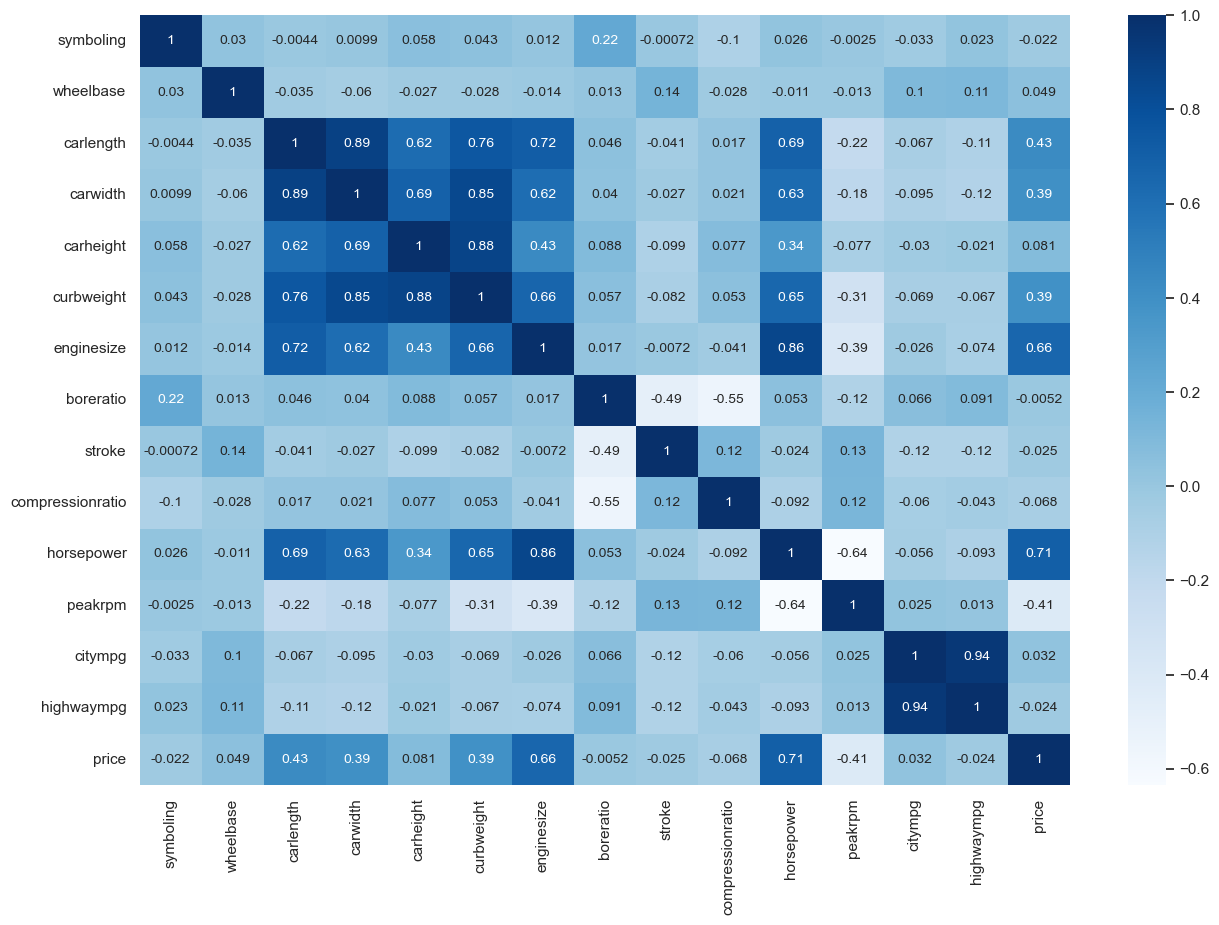

In [24]:
# Example 12 - Heatmap 

# Eliminando columnas que no necesitamos
#del new_raw_data['car_ID']
del new_raw_data['CarName']

# Aumenta el tamaño de los gráficos de sns.
sns.set(rc={'figure.figsize':(15,10)})

n_variables = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

pc = new_raw_data[n_variables].corr(method ='pearson')

cols = n_variables

ax = sns.heatmap(pc, annot=True,
                 yticklabels=cols,
                 xticklabels=cols,
                 annot_kws={'size':10},
                 cmap="Blues")

In [25]:
new_raw_data.dtypes

car_ID                    int64
symboling                 int64
wheelbase               float64
carlength               float64
carwidth                float64
carheight               float64
curbweight              float64
cylindernumber            int32
enginesize                int64
boreratio               float64
stroke                  float64
compressionratio        float64
horsepower                int64
peakrpm                   int64
citympg                   int64
highwaympg                int64
price                   float64
carbody_Coupé              bool
carbody_SUV                bool
carbody_Van                bool
carbody_hatchback          bool
carbody_sedan              bool
aspiration_std             bool
aspiration_turbo           bool
doornumber_four            bool
drivewheel_awd             bool
drivewheel_fwd             bool
drivewheel_rwd             bool
enginelocation_front       bool
fuelsystem_idi             bool
fuelsystem_mpfi            bool
enginety

# observacion 
## Determinar la importancia de las características implica seguir estos pasos:

* Separar los datos en variables predictoras (X) y la variable objetivo (y).
* Aplicar algoritmos de aprendizaje Tree-based.
* La importancia de una característica se mide al calcular cómo cambia el error de predicción del modelo cuando se permuta esa característica.

In [26]:
# Divide los datos en X e y.

X = new_raw_data.drop(['price'], axis = 1).values
X_columns = new_raw_data.drop(['price'], axis = 1)
y = new_raw_data['price'].astype(int)

print(X.shape)
print(y.shape)

(250, 38)
(250,)


In [27]:
# correr la estimacion en Tree-based  (i.e. decision trees & random forests)

dt = DecisionTreeClassifier(random_state=15, criterion  = 'entropy', max_depth = 10)
dt.fit(X,y)


DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=15)

In [28]:
dt.feature_importances_

array([0.072374, 0.044704, 0.044250, 0.082068, 0.143993, 0.050644,
       0.019835, 0.002203, 0.030074, 0.055166, 0.019026, 0.017015,
       0.209181, 0.078027, 0.028266, 0.038667, 0.000000, 0.001517,
       0.001517, 0.007495, 0.000000, 0.006609, 0.003034, 0.000000,
       0.002203, 0.002619, 0.001101, 0.000000, 0.002203, 0.000000,
       0.001101, 0.000000, 0.005121, 0.010137, 0.005306, 0.005923,
       0.008619, 0.000000])

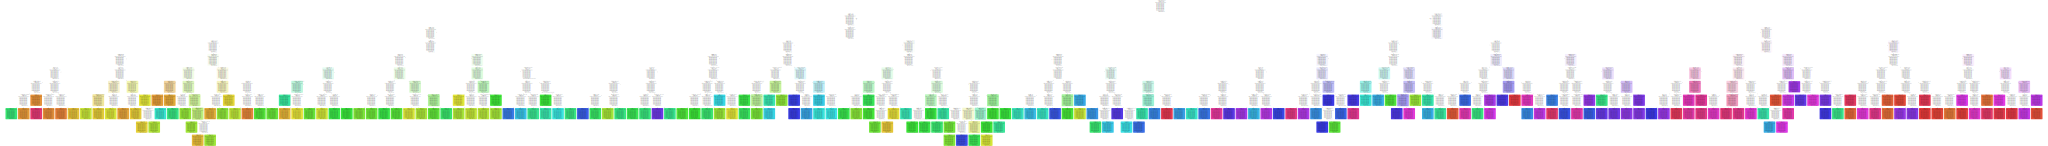

In [29]:
import graphviz 
from sklearn import tree

dot_data = tree.export_graphviz(dt, out_file=None, 
    feature_names=new_raw_data.drop('price', axis=1).columns,    
    class_names=new_raw_data['price'].unique().astype(str),  
    filled=True, rounded=True,  
    special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [30]:
#del final_fi

# calculuando FI
for i, column in enumerate(new_raw_data.drop('price', axis=1)):
    print('Importance of feature {}:, {:.3f}'.format(column, dt.feature_importances_[i]))
    
    fi = pd.DataFrame({'Variable': [column], 'Feature Importance Score': [dt.feature_importances_[i]]})
    
    try:
        final_fi = pd.concat([final_fi,fi], ignore_index = True)
    except:
        final_fi = fi
        
        
# Ordenando la data
final_fi = final_fi.sort_values('Feature Importance Score', ascending = False).reset_index()            
final_fi

Importance of feature car_ID:, 0.072
Importance of feature symboling:, 0.045
Importance of feature wheelbase:, 0.044
Importance of feature carlength:, 0.082
Importance of feature carwidth:, 0.144
Importance of feature carheight:, 0.051
Importance of feature curbweight:, 0.020
Importance of feature cylindernumber:, 0.002
Importance of feature enginesize:, 0.030
Importance of feature boreratio:, 0.055
Importance of feature stroke:, 0.019
Importance of feature compressionratio:, 0.017
Importance of feature horsepower:, 0.209
Importance of feature peakrpm:, 0.078
Importance of feature citympg:, 0.028
Importance of feature highwaympg:, 0.039
Importance of feature carbody_Coupé:, 0.000
Importance of feature carbody_SUV:, 0.002
Importance of feature carbody_Van:, 0.002
Importance of feature carbody_hatchback:, 0.007
Importance of feature carbody_sedan:, 0.000
Importance of feature aspiration_std:, 0.007
Importance of feature aspiration_turbo:, 0.003
Importance of feature doornumber_four:, 0.0

index              Variable  Feature Importance Score
0      12            horsepower                  0.209181
1       4              carwidth                  0.143993
2       3             carlength                  0.082068
3      13               peakrpm                  0.078027
4       0                car_ID                  0.072374
5       9             boreratio                  0.055166
6       5             carheight                  0.050644
7       1             symboling                  0.044704
8       2             wheelbase                  0.044250
9      15            highwaympg                  0.038667
10      8            enginesize                  0.030074
11     14               citympg                  0.028266
12      6            curbweight                  0.019835
13     10                stroke                  0.019026
14     11      compressionratio                  0.017015
15     33        enginetype_ohc                  0.010137
16     36       fueltype_diesel                  0.008619
17     19     carbody_hatchback                  0.007495
18     21        aspiration_std                  0.006609
19     35       enginetype_ohcv                  0.005923
20     34       enginetype_ohcf                  0.005306
21     32          enginetype_l                  0.005121
22     22      aspiration_turbo                  0.003034
23     25        drivewheel_fwd                  0.002619
24     28        fuelsystem_idi                  0.002203
25      7        cylindernumber                  0.002203
26     24        drivewheel_awd                  0.002203
27     18           carbody_Van                  0.001517
28     17           carbody_SUV                  0.001517
29     30       enginetype_dohc                  0.001101
30     26        drivewheel_rwd                  0.001101
31     29       fuelsystem_mpfi                  0.000000
32     31      enginetype_dohcv                  0.000000
33     27  enginelocation_front                  0.000000
34     16         carbody_Coupé                  0.000000
35     23       doornumber_four                  0.000000
36     20         carbody_sedan                  0.000000
37     37     fueltype_gasolina                  0.000000

# Dividiendo los Datos - Validación Hold-out

In [31]:
# Validacion Hold-out

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size = 0.2, random_state=15)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(200, 38)
(50, 38)
(200,)
(50,)


# Linea de Regression

In [32]:
# Entrenando la Regression

lm = LinearRegression(fit_intercept = True)
lm.fit(X_train, y_train)

y_pred = lm.predict(X_train)

In [33]:
# Precisión del Modelo en el Conjunto de Entrenamiento

print('La precisión en el conjunto de entrenamiento es: ', lm.score(X_train, y_train) )
print('La precisión r2 en la predicción del conjunto de entrenamiento es: ',r2_score(y_train,y_pred) )   

print("")
# Precisión del Modelo en el Conjunto de Pruebas
print('La precisión en el conjunto de pruebas es: ', lm.score(X_test, y_test) )

print("")
# El Error Cuadrático Medio ( (RMSE)
print('El RMSE en el conjunto de entrenamiento es: ',sqrt(mean_squared_error(y_train,y_pred)))
print('El RMSE en el conjunto de pruebas es: ',sqrt(mean_squared_error(y_test,lm.predict(X_test))))

print("")
# El Error Absoluto Medio (MAE)
print('El MAE en el conjunto de entrenamiento es: ',mean_absolute_error(y_train,y_pred))
print('El MAE en el conjunto de pruebas es: ',mean_absolute_error(y_test,lm.predict(X_test)))


print("")
# Coeficiente 
print('Coeficiente: ', lm.coef_ )

print("")
# The Intercecion 
print('Intercepcion: ', lm.intercept_)


La precisión en el conjunto de entrenamiento es:  0.7341313453704033
La precisión r2 en la predicción del conjunto de entrenamiento es:  0.7341313453704033

La precisión en el conjunto de pruebas es:  0.6344322891298317

El RMSE en el conjunto de entrenamiento es:  10437.152286015616
El RMSE en el conjunto de pruebas es:  11998.507899395398

El MAE en el conjunto de entrenamiento es:  7172.068426964263
El MAE en el conjunto de pruebas es:  8059.941865023379

Coeficiente:  [8.333316 -920.728011 199.890807 2.262982 46.541164 -703.255486 1.923089
 979.068124 5.433307 -9190.148630 -10463.684493 -200.810107 70.182500
 -3.126493 420.035711 -182.644653 11193.576971 -827.286684 1268.846849
 -1835.323362 -9799.813774 -332.370399 332.370399 -0.000000 5577.446970
 -5329.225832 -248.221138 -0.000000 393.970434 -393.970434 6711.512099
 -21386.306003 1732.763776 2778.061784 2873.601343 7290.367001
 -9141.004359 9141.004359]

Intercepcion:  85901.01929139033


In [34]:
new_raw_data.head()

car_ID  symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0     751          2       97.3      469.5     189.0      175.5    33169.50   
1     752          3       94.5      508.9     198.3      173.7    34444.71   
2     753          2       94.5      376.5     166.0      152.0    25232.00   
3     754          2      100.4      460.0     206.9      172.4    35669.56   
4     755          2      100.4      479.5     185.5      183.5    34039.25   

   cylindernumber  enginesize  boreratio  stroke  compressionratio  \
0               4        2184       3.78    3.15               9.5   
1               6        2967       3.78    3.15               9.5   
2               6        1197       3.78    3.15               9.5   
3               4        2179       3.62    3.15               7.5   
4               4        2755       3.62    3.15               7.5   

   horsepower  peakrpm  citympg  highwaympg    price  carbody_Coupé  \
0         450     1750       19          24  33000.0          False   
1         550     1750       20          24  28800.0          False   
2         114     4000       19          24   5940.0          False   
3         400     1750       37          46  50400.0          False   
4         450     1600       27          34  30600.0          False   

   carbody_SUV  carbody_Van  carbody_hatchback  carbody_sedan  aspiration_std  \
0         True        False              False          False            True   
1         True        False              False          False            True   
2        False        False               True          False            True   
3         True        False              False          False            True   
4         True        False              False          False            True   

   aspiration_turbo  doornumber_four  drivewheel_awd  drivewheel_fwd  \
0             False             True            True           False   
1             False             True            True           False   
2             False             True           False            True   
3             False             True            True           False   
4             False             True           False           False   

   drivewheel_rwd  enginelocation_front  fuelsystem_idi  fuelsystem_mpfi  \
0           False                  True           False             True   
1           False                  True           False             True   
2           False                  True            True            False   
3           False                  True           False             True   
4            True                  True            True            False   

   enginetype_dohc  enginetype_dohcv  enginetype_l  enginetype_ohc  \
0             True             False         False           False   
1             True             False         False           False   
2            False             False         False            True   
3            False             False         False            True   
4            False             False         False            True   

   enginetype_ohcf  enginetype_ohcv  fueltype_diesel  fueltype_gasolina  
0            False            False             True              False  
1            False            False             True              False  
2            False            False            False               True  
3            False            False             True              False  
4            False            False             True              False

# Intentando regresión con menos variables.

In [35]:
final_fi['Variable'][0:10].values

array(['horsepower', 'carwidth', 'carlength', 'peakrpm', 'car_ID',
       'boreratio', 'carheight', 'symboling', 'wheelbase', 'highwaympg'],
      dtype=object)

In [36]:
#Dividir los datos en X & y

test1 = final_fi['Variable'][0:10].values

X2 = new_raw_data[test1].values
y2 = new_raw_data['price'].astype(int)

# Validacion Hold-out 
X_train, X_test, y_train, y_test = train_test_split(X2, y2, train_size=0.80, test_size = 0.2, random_state=15)


print(X.shape)
print(y.shape)

lm2 = LinearRegression(fit_intercept = True)
lm2.fit(X_train, y_train)

y_pred = lm2.predict(X_train)


#Precisión del modelo en el conjunto de pruebas
print('La precisión en el conjunto de pruebas es: ', lm2.score(X_test, y_test) )
print('El RMSE en el conjunto de pruebas es: ',sqrt(mean_squared_error(y_test,lm2.predict(X_test))))
print('El MAE en el conjunto de pruebas es: ',mean_absolute_error(y_test,lm2.predict(X_test)))

(250, 38)
(250,)
La precisión en el conjunto de pruebas es:  0.5491161241638278
El RMSE en el conjunto de pruebas es:  13325.259626279058
El MAE en el conjunto de pruebas es:  7462.505811251816


In [37]:
y2

0      33000
1      28800
2       5940
3      50400
4      30600
       ...  
245     3840
246     7440
247     7200
248    21000
249    59400
Name: price, Length: 250, dtype: int32

# Intentando el proceso de eliminación recursiva de características

In [38]:
# with Linear Regression

from sklearn.feature_selection import RFE

selector = RFE(lm, n_features_to_select=10, step=1)
selector = selector.fit(X, y)
selector.support_

print('Las 10 mejores características seleccionadas por el método  rfe:',X_columns.columns[selector.support_])

rfe_lr = X_columns.columns[selector.support_]

Las 10 mejores características seleccionadas por el método  rfe: Index(['carbody_Coupé', 'carbody_SUV', 'carbody_Van', 'carbody_hatchback',
       'carbody_sedan', 'aspiration_std', 'drivewheel_awd', 'drivewheel_fwd',
       'enginetype_dohcv', 'enginetype_ohcv'],
      dtype='object')


In [39]:
# Dividiendo la data en X & y

test1 = rfe_lr

X2 = new_raw_data[test1].values
y2 = new_raw_data['price'].astype(int)

c# vaidacion Hold-out 
X_train, X_test, y_train, y_test = train_test_split(X2, y2, train_size=0.80, test_size = 0.2, random_state=15)


print(X.shape)
print(y.shape)

lm2 = LinearRegression(fit_intercept = True)
lm2.fit(X_train, y_train)

y_pred = lm2.predict(X_train)


# Precisión del modelo en el conjunto de pruebas
print('La precisión en el conjunto de pruebas es: ', lm2.score(X_test, y_test) )
print('el RMSE  en el conjunto de pruebas es: ',sqrt(mean_squared_error(y_test,lm2.predict(X_test))))
print('The MAE  en el conjunto de pruebas es: ',mean_absolute_error(y_test,lm2.predict(X_test)))

(250, 38)
(250,)
La precisión en el conjunto de pruebas es:  0.5233593866226283
el RMSE  en el conjunto de pruebas es:  13700.576736672481
The MAE  en el conjunto de pruebas es:  8372.173522726402


In [40]:
#Con un Regresor de Vectores de Soporte

from sklearn.svm import SVR
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=10, step=1)
selector = selector.fit(X, y)
selector.support_
print('Las 10 mejores características seleccionadas por rfe:',X_columns.columns[selector.support_])

rfe_svr = X_columns.columns[selector.support_]

Las 10 mejores características seleccionadas por rfe: Index(['wheelbase', 'carwidth', 'carheight', 'compressionratio', 'horsepower',
       'citympg', 'carbody_SUV', 'drivewheel_fwd', 'fueltype_diesel',
       'fueltype_gasolina'],
      dtype='object')


In [41]:
# dividiendo la data  X & y

test1 = rfe_svr

X2 = new_raw_data[test1].values
y2 = new_raw_data['price'].astype(int)

# validacion Hold-out 
X_train, X_test, y_train, y_test = train_test_split(X2, y2, train_size=0.80, test_size = 0.2, random_state=15)


print(X.shape)
print(y.shape)

lm2 = LinearRegression(fit_intercept = True)
lm2.fit(X_train, y_train)

y_pred = lm2.predict(X_train)


#  Precisión del modelo en el conjunto de pruebas
print('La precisión en el conjunto de pruebas es: ', lm2.score(X_test, y_test) )
print('El RMSE  en el conjunto de pruebas es: ',sqrt(mean_squared_error(y_test,lm2.predict(X_test))))
print('EL MAE  en el conjunto de pruebas es: ',mean_absolute_error(y_test,lm2.predict(X_test)))

(250, 38)
(250,)
La precisión en el conjunto de pruebas es:  0.6761781662910659
El RMSE  en el conjunto de pruebas es:  11292.663599469928
EL MAE  en el conjunto de pruebas es:  6540.729934477027


# Utuilizando otros modelos
## Random Forest

In [42]:
from sklearn.ensemble import RandomForestRegressor

# Validacion Hold-out 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size = 0.2, random_state=15)

regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, y_train)

y_pred = regr.predict(X_train)


# Precision del modelo en el conjunto de prueba 
print('La precision en ele conjunto de prueba es: ', regr.score(X_test, y_test) )
print('EL RMSE  en el conjunto de prueba: ',sqrt(mean_squared_error(y_test,regr.predict(X_test))))
print('El MAE  en el conjunto de prueba: ',mean_absolute_error(y_test,regr.predict(X_test)))


La precision en ele conjunto de prueba es:  0.8308481426397116
EL RMSE  en el conjunto de prueba:  8161.720394827727
El MAE  en el conjunto de prueba:  5596.410538024616


In [43]:
# Optimizando Random Forest en  R

from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

grid_search = GridSearchCV(estimator = regr, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X_train, y_train)

grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 300}

In [44]:
best_grid = grid_search.best_estimator_
best_grid

RandomForestRegressor(max_depth=80, max_features=3, min_samples_leaf=3,
                      min_samples_split=8, n_estimators=300, random_state=0)

In [45]:
best_grid = grid_search.best_estimator_

regr = best_grid
regr.fit(X_train, y_train)

y_pred = regr.predict(X_train)


# presision del modelo en el conjunto de prueba
print('La precision en el conjunto de prueba es: ', regr.score(X_test, y_test) )
print('EL RMSE  en el conjunto de prueba es: ',sqrt(mean_squared_error(y_test,regr.predict(X_test))))
print('El MAE  en el conjunto de prueba es: ',mean_absolute_error(y_test,regr.predict(X_test)))


La precision en el conjunto de prueba es:  0.679324246381218
EL RMSE  en el conjunto de prueba es:  11237.672962626739
El MAE  en el conjunto de prueba es:  5782.760563982974


 # XG Boost Regresso
    

In [46]:
from sklearn.ensemble import GradientBoostingRegressor

reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train, y_train)

y_pred = reg.predict(X_train)

#presision del modelo en el conjunto de prueba
print('La precision en el conjunto de prueba es:', reg.score(X_test, y_test) )
print('EL RMSE  en el conjunto de prueba es:  ',sqrt(mean_squared_error(y_test,reg.predict(X_test))))
print('El MAE  en el conjunto de prueba es: ',mean_absolute_error(y_test,reg.predict(X_test)))



La precision en el conjunto de prueba es: 0.85340175556996
EL RMSE  en el conjunto de prueba es:   7598.147356282497
El MAE  en el conjunto de prueba es:  4474.164601780148


In [47]:
# Optimizando XGBoost Regressor

from sklearn.model_selection import GridSearchCV
import xgboost as xgb

params = { 'max_depth': [3,6,9,12],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [0.3, 0.7]}

xgbr = xgb.XGBRegressor(seed = 20)

clf = GridSearchCV(estimator=xgbr, 
                   param_grid=params,
                   scoring='neg_mean_squared_error', 
                   verbose=1)

clf.fit(X_train, y_train)

print("Mejores Paremetros:", clf.best_params_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Mejores Paremetros: {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


In [48]:
clf.best_params_

{'colsample_bytree': 0.3,
 'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 100}

In [49]:
# Entrenando el modelo con los mejores parámetros.

xgbr = xgb.XGBRegressor(seed = 20, colsample_bytree = 0.7, learning_rate= 0.1, max_depth=12, n_estimators=500)
xgbr.fit(X_train, y_train)
xgbr

y_pred = xgbr.predict(X_train)

#presision del modelo en el conjunto de prueba
print('La precision en el conjunto de prueba es: ', xgbr.score(X_test, y_test) )
print('EL RMSE  en el conjunto de prueba es: ',sqrt(mean_squared_error(y_test,xgbr.predict(X_test))))
print('El MAE  en el conjunto de prueba es: ',mean_absolute_error(y_test,xgbr.predict(X_test)))


La precision en el conjunto de prueba es:  0.8406900593619928
EL RMSE  en el conjunto de prueba es:  7920.721895363938
El MAE  en el conjunto de prueba es:  4742.004658203125


# Neural Network Regressor - MLPRegressor

In [50]:
from sklearn.neural_network import MLPRegressor

regr = MLPRegressor(random_state=1, max_iter=500)
regr.fit(X_train, y_train)

y_pred = regr.predict(X_train)
# Presision del modelo en el conjunto de prueba
print('La precision en el conjunto de prueba es: ', regr.score(X_test, y_test) )
print('EL RMSE  en el conjunto de prueba es: ',sqrt(mean_squared_error(y_test,regr.predict(X_test))))
print('EL MAE  en el conjunto de prueba es: ',mean_absolute_error(y_test,regr.predict(X_test)))

La precision en el conjunto de prueba es:  0.4412401071303287
EL RMSE  en el conjunto de prueba es:  14833.920250336727
EL MAE  en el conjunto de prueba es:  8281.274143316154


C:\Users\jimen\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [51]:
# Optimisando MLPR

parameter_space = {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

regr = MLPRegressor(random_state=1, max_iter=500)

clf = GridSearchCV(regr, parameter_space, n_jobs=-1, cv=5)
clf.fit(X_train, y_train)

print("mejores parametros:", clf.best_params_)

C:\Users\jimen\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
4 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\jimen\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jimen\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\jimen\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 753, in fit
 

mejores parametros: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'constant', 'solver': 'adam'}


C:\Users\jimen\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [52]:
# Entrenando el modelo en los mejores parametros

regr = MLPRegressor(random_state=1, max_iter=500, activation='relu', alpha= 0.05, hidden_layer_sizes= (10, 30, 10), learning_rate= 'constant', solver= 'adam')
regr.fit(X_train, y_train)


y_pred = regr.predict(X_train)
# Model Accuracy on testing dataset
print('La precision en el conjunto de prueba es: ', regr.score(X_test, y_test) )
print('el RMSE en el conjunto de prueba es: ',sqrt(mean_squared_error(y_test,regr.predict(X_test))))
print('el MAEen en el conjunto de prueba es: ',mean_absolute_error(y_test,regr.predict(X_test)))

La precision en el conjunto de prueba es:  0.3862078718283586
el RMSE en el conjunto de prueba es:  15547.264399289545
el MAEen en el conjunto de prueba es:  9751.083161745524


C:\Users\jimen\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


# Conclusiones: El Regresor XGBoost sin optimización realizó el mejor trabajo.

In [53]:
from sklearn.ensemble import GradientBoostingRegressor

# dividiento los datos en x &y 

# del new_raw_data['Price Predictions']

X = new_raw_data.drop(['price'], axis = 1).values
X_columns = new_raw_data.drop(['price'], axis = 1)
y = new_raw_data['price'].astype(int)

print(X.shape)
print(y.shape)

#validacion  Hold-out

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size = 0.2, random_state=15)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train, y_train)

y_pred = reg.predict(X_train)

# Precisión del modelo en el conjunto de pruebas
print('La precisión en el conjunto de pruebas es: ', reg.score(X_test, y_test) )
print('el RMSE  en el conjunto de pruebas es: ',sqrt(mean_squared_error(y_test,reg.predict(X_test))))
print('el MAE  en el conjunto de pruebas es: ',mean_absolute_error(y_test,reg.predict(X_test)))


(250, 38)
(250,)
(200, 38)
(50, 38)
(200,)
(50,)
La precisión en el conjunto de pruebas es:  0.85340175556996
el RMSE  en el conjunto de pruebas es:  7598.147356282497
el MAE  en el conjunto de pruebas es:  4474.164601780148


In [54]:
X_train.shape

(200, 38)

In [55]:
y_pred.shape

(200,)

C:\Users\jimen\AppData\Local\Temp\ipykernel_22896\3921280256.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', c='red', lw=3)


Text(0.5, 1.0, 'Actuals Vs Predicted Values')

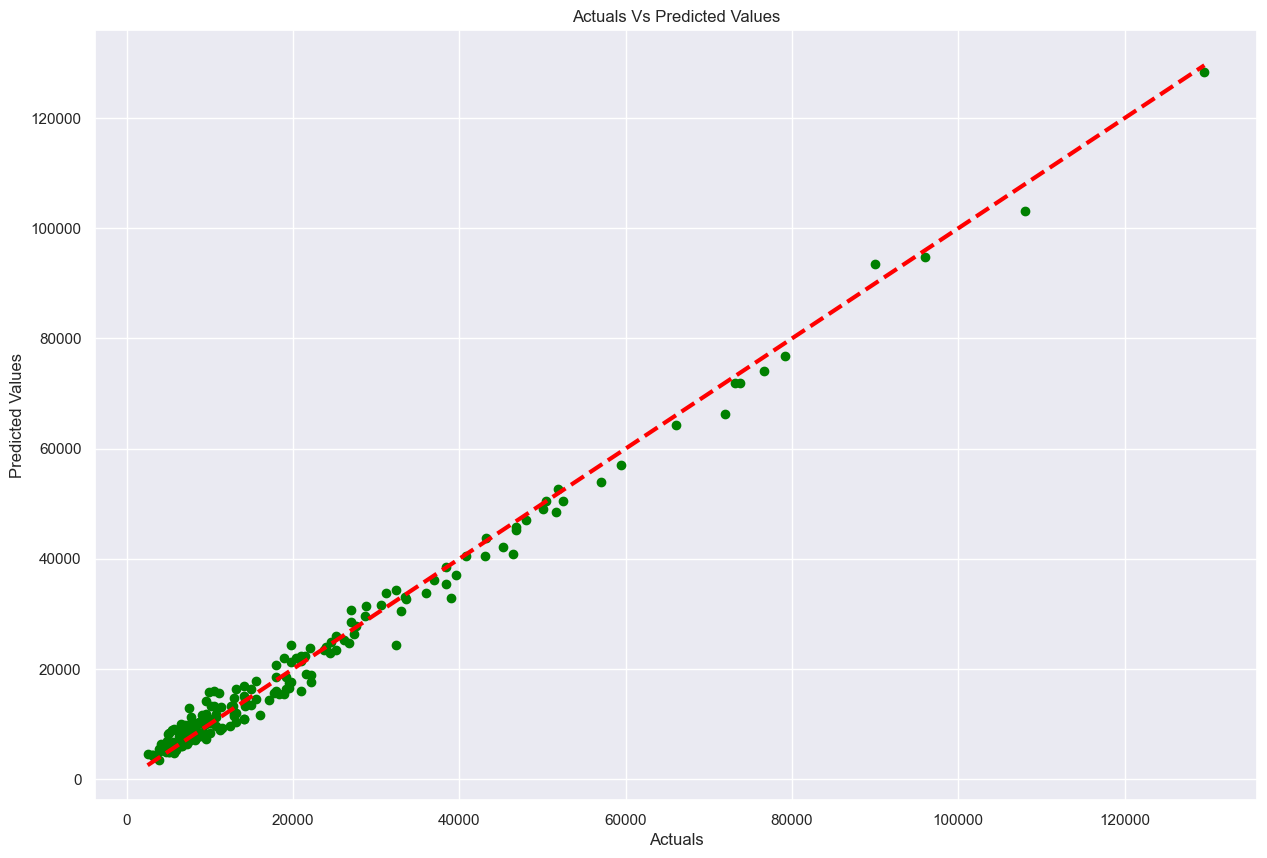

In [56]:

# Graficando Valores Reales vs Predictivos

plt.figure(figsize=(15,10))

plt.scatter(y_train, y_pred, c='green')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', c='red', lw=3)
plt.xlabel('Actuals')
plt.ylabel('Predicted Values')
plt.title('Actuals Vs Predicted Values')
# Incrementando tamano 

In [57]:
X_train

array([[753, 2, 94.5, ..., False, False, True],
       [995, -1, 109.1, ..., False, False, True],
       [882, 1, 109.1, ..., False, True, False],
       ...,
       [891, -1, 97.3, ..., False, True, False],
       [996, -1, 109.1, ..., False, False, True],
       [951, 0, 100.4, ..., False, False, True]], dtype=object)

In [58]:
# Arreglando el dataframe de entrenamiento
final_df = pd.DataFrame(X_train, columns = X_columns.columns)
final_df['Price'] = y_train.values
final_df['Phase'] = 'Existing data'
final_df['Price Predictions'] = y_pred
print(final_df.shape)
final_df

final_df2 = pd.DataFrame(X_test, columns = X_columns.columns)
final_df2['Price'] = y_test.values
final_df2['Phase'] = 'New unseen data'
final_df2['Price Predictions'] = reg.predict(X_test)
print(final_df2.shape)
final_df2

# Uniendo los conjuntos de datos
final_df3 = pd.concat([final_df, final_df2], ignore_index = True)
print(final_df3.shape)
final_df3.head()

# Uniendo los conjuntos de datos con una unión izquierda, agregando las predicciones al conjunto de datos original.
raw_data['car_ID'] = raw_data['car_ID'].astype(int)
final_df3['car_ID'] = final_df3['car_ID'].astype(int)

(200, 41)
(50, 41)
(250, 41)


# Uniendo el conjunto de datos original con las predicciones.

In [59]:

# arreglando el entrenamiento df
final_df = pd.DataFrame(X_train, columns = X_columns.columns)
final_df['Price'] = y_train.values
final_df['Phase'] = 'Existing data'
final_df['Price Predictions'] = y_pred
print(final_df.shape)

# Corrigiendo el conjunto de pruebas. df
final_df2 = pd.DataFrame(X_test, columns = X_columns.columns)
final_df2['Price'] = y_test.values
final_df2['Phase'] = 'New unseen data'
final_df2['Price Predictions'] = reg.predict(X_test)
print(final_df2.shape)

# uniendolos
final_df3 = pd.concat([final_df, final_df2], ignore_index = True)
print(final_df3.shape)
final_df3.head()


# Realizando una unión izquierda con el conjunto de datos original y las predicciones
raw_data['car_ID'] = raw_data['car_ID'].astype(int)
final_df3['car_ID'] = final_df3['car_ID'].astype(int)

final_df4 = raw_data.merge(final_df3[['car_ID','Phase','Price Predictions']], how = 'left', on = 'car_ID')
final_df4['CarName'] = final_df4['CarName'] + ' - ' + final_df4['car_ID'].astype(str)
print(final_df4.shape)
final_df4.head()

(200, 41)
(50, 41)
(250, 41)
(250, 28)


car_ID  symboling                                            CarName  \
0     751          2  Mahindra-XUV700 AX 7 diesel AT AWD Luxury Pack...   
1     752          3       Audi-Q7 35 TDI Premium + Sunroof - 957 - 752   
2     753          2  Hyundai-Grand i10 Magna 1.2 Kappa VTVT [2013-2...   
3     754          2  Land Rover-Discovery Sport HSE 7-Seater - 959 ...   
4     755          2  Toyota-Fortuner 2.8 4x2 AT [2016-2020] - 960 -...   

   fueltype aspiration doornumber    carbody drivewheel enginelocation  \
0    diesel        std       four        SUV        awd          front   
1    diesel        std       four        SUV        awd          front   
2  gasolina        std       four  hatchback        fwd          front   
3    diesel        std       four        SUV        awd          front   
4    diesel        std       four        SUV        rwd          front   

   wheelbase  carlength  carwidth  carheight  curbweight enginetype  \
0       97.3      469.5     189.0      175.5    33169.50       dohc   
1       94.5      508.9     198.3      173.7    34444.71       dohc   
2       94.5      376.5     166.0      152.0    25232.00        ohc   
3      100.4      460.0     206.9      172.4    35669.56        ohc   
4      100.4      479.5     185.5      183.5    34039.25        ohc   

  cylindernumber  enginesize fuelsystem  boreratio  stroke  compressionratio  \
0           four        2184       mpfi       3.78    3.15               9.5   
1            six        2967       mpfi       3.78    3.15               9.5   
2            six        1197        idi       3.78    3.15               9.5   
3           four        2179       mpfi       3.62    3.15               7.5   
4           four        2755        idi       3.62    3.15               7.5   

   horsepower  peakrpm  citympg  highwaympg    price          Phase  \
0         450     1750       19          24  33000.0  Existing data   
1         550     1750       20          24  28800.0  Existing data   
2         114     4000       19          24   5940.0  Existing data   
3         400     1750       37          46  50400.0  Existing data   
4         450     1600       27          34  30600.0  Existing data   

   Price Predictions  
0       30526.657520  
1       31467.974981  
2        5270.965271  
3       50436.745558  
4       31613.278043

In [60]:
final_df4.to_excel('CarPrice_Assignment_DS2_Output.xlsx', index=False)
print(os.getcwd())

C:\Users\jimen\Desktop\power bi\Proyecto_Final\expo
